In [1]:
import SNIDsn
import SNIDdataset as snid
import numpy as np
import SNePCA

import plotly.plotly as ply
import plotly.graph_objs as go
import plotly.tools as tls

import matplotlib.pyplot as plt

import pandas

### Load preprocessed SNID datasets 

datasetX contains the SNID spectra for the phase range X +/- 5 days, where each SNe has only 1 spectrum in this phase range.  The spectrum with phase closest to X is chosen. All of the preprocessing has been applied (wavelength cut, smoothing, phase type, etc)

In [2]:
dataset0 = snid.loadPickle('../Data/DataProducts/dataset0.pickle')
dataset5 = snid.loadPickle('../Data/DataProducts/dataset5.pickle')
dataset10 = snid.loadPickle('../Data/DataProducts/dataset10.pickle')
dataset15 = snid.loadPickle('../Data/DataProducts/dataset15.pickle')

### Reduce Resolution

In [3]:
factor = 50.0
snid.datasetReduceResolution(dataset0, factor)
snid.datasetReduceResolution(dataset5, factor)
snid.datasetReduceResolution(dataset10, factor)
snid.datasetReduceResolution(dataset15, factor)

0 4216.388041262388
1 4511.605434628244
2 4827.492962832933
3 5165.497879608301
4 5527.168770553683
5 5914.162648054457
6 6328.252542963088
7 6771.335627824289
0 4216.388041262388
1 4511.605434628244
2 4827.492962832933
3 5165.497879608301
4 5527.168770553683
5 5914.162648054457
6 6328.252542963088
7 6771.335627824289
0 4216.388041262388
1 4511.605434628244
2 4827.492962832933
3 5165.497879608301
4 5527.168770553683
5 5914.162648054457
6 6328.252542963088
7 6771.335627824289
0 4216.388041262388
1 4511.605434628244
2 4827.492962832933
3 5165.497879608301
4 5527.168770553683
5 5914.162648054457
6 6328.252542963088
7 6771.335627824289
0 4216.388041262388
1 4511.605434628244
2 4827.492962832933
3 5165.497879608301
4 5527.168770553683
5 5914.162648054457
6 6328.252542963088
7 6771.335627824289
0 4216.388041262388
1 4511.605434628244
2 4827.492962832933
3 5165.497879608301
4 5527.168770553683
5 5914.162648054457
6 6328.252542963088
7 6771.335627824289
0 4216.388041262388
1 4511.605434628244


0 4216.388041262388
1 4511.605434628244
2 4827.492962832933
3 5165.497879608301
4 5527.168770553683
5 5914.162648054457
6 6328.252542963088
7 6771.335627824289
0 4216.388041262388
1 4511.605434628244
2 4827.492962832933
3 5165.497879608301
4 5527.168770553683
5 5914.162648054457
6 6328.252542963088
7 6771.335627824289
0 4216.388041262388
1 4511.605434628244
2 4827.492962832933
3 5165.497879608301
4 5527.168770553683
5 5914.162648054457
6 6328.252542963088
7 6771.335627824289
0 4216.388041262388
1 4511.605434628244
2 4827.492962832933
3 5165.497879608301
4 5527.168770553683
5 5914.162648054457
6 6328.252542963088
7 6771.335627824289
0 4216.388041262388
1 4511.605434628244
2 4827.492962832933
3 5165.497879608301
4 5527.168770553683
5 5914.162648054457
6 6328.252542963088
7 6771.335627824289
0 4216.388041262388
1 4511.605434628244
2 4827.492962832933
3 5165.497879608301
4 5527.168770553683
5 5914.162648054457
6 6328.252542963088
7 6771.335627824289
0 4216.388041262388
1 4511.605434628244


In [4]:
dataset0['sn1998dt'].wavelengths

array([4216.38804126, 4511.60543463, 4827.49296283, 5165.49787961,
       5527.16877055, 5914.16264805, 6328.25254296, 6771.33562782])

### Run PCA

In [5]:
snidPCA0 = SNePCA.SNePCA(dataset0, -5, 5)
snidPCA5 = SNePCA.SNePCA(dataset5, 0, 10)
snidPCA10 = SNePCA.SNePCA(dataset10, 5, 15)
snidPCA15 = SNePCA.SNePCA(dataset15, 10, 20)

In [6]:
snidPCA0.snidPCA()
snidPCA5.snidPCA()
snidPCA10.snidPCA()
snidPCA15.snidPCA()

Choose the arbitrary signs for the eigenspectra so that they are consistent across phases, and so that the eigenspectra features match H and He absorption features in the mean spectra.

In [7]:
snidPCA10.evecs[0] = -snidPCA10.evecs[0]

snidPCA5.evecs[1] = -snidPCA5.evecs[1]
snidPCA10.evecs[1] = -snidPCA10.evecs[1]
snidPCA15.evecs[1] = -snidPCA15.evecs[1]

snidPCA0.evecs[2] = -snidPCA0.evecs[2]
snidPCA5.evecs[2] = -snidPCA5.evecs[2]
snidPCA15.evecs[2] = -snidPCA15.evecs[2]

snidPCA0.evecs[3] = -snidPCA0.evecs[3]
snidPCA5.evecs[3] = -snidPCA5.evecs[3]
snidPCA10.evecs[3] = -snidPCA10.evecs[3]

snidPCA0.evecs[4] = -snidPCA0.evecs[4]

In [8]:
snidPCA0.calcPCACoeffs()
snidPCA5.calcPCACoeffs()
snidPCA10.calcPCACoeffs()
snidPCA15.calcPCACoeffs()

In [9]:
print(snidPCA0.pcaCoeffMatrix.shape)
print(snidPCA5.pcaCoeffMatrix.shape)
print(snidPCA10.pcaCoeffMatrix.shape)
print(snidPCA15.pcaCoeffMatrix.shape)

(55, 8)
(52, 8)
(56, 8)
(54, 8)


In [10]:
# Set colors for plots
snidPCA0.Ib_color = 'steelblue'
snidPCA5.Ib_color = 'steelblue'
snidPCA10.Ib_color = 'steelblue'
snidPCA15.Ib_color = 'steelblue'
snidPCA0.IIb_color = 'limegreen'
snidPCA5.IIb_color = 'limegreen'
snidPCA10.IIb_color = 'limegreen'
snidPCA15.IIb_color = 'limegreen'
snidPCA0.IcBL_color = 'darkgrey'
snidPCA5.IcBL_color = 'darkgrey'
snidPCA10.IcBL_color = 'darkgrey'
snidPCA15.IcBL_color = 'darkgrey'


snidPCA0.IIb_ellipse_color = 'green'
snidPCA5.IIb_ellipse_color = 'green'
snidPCA10.IIb_ellipse_color = 'green'
snidPCA15.IIb_ellipse_color = 'green'
snidPCA0.IcBL_ellipse_color = 'grey'
snidPCA5.IcBL_ellipse_color = 'grey'
snidPCA10.IcBL_ellipse_color = 'grey'
snidPCA15.IcBL_ellipse_color = 'grey'


# Reconstruction

The following plots show that PCA can reconstruct the original spectra in our dataset.

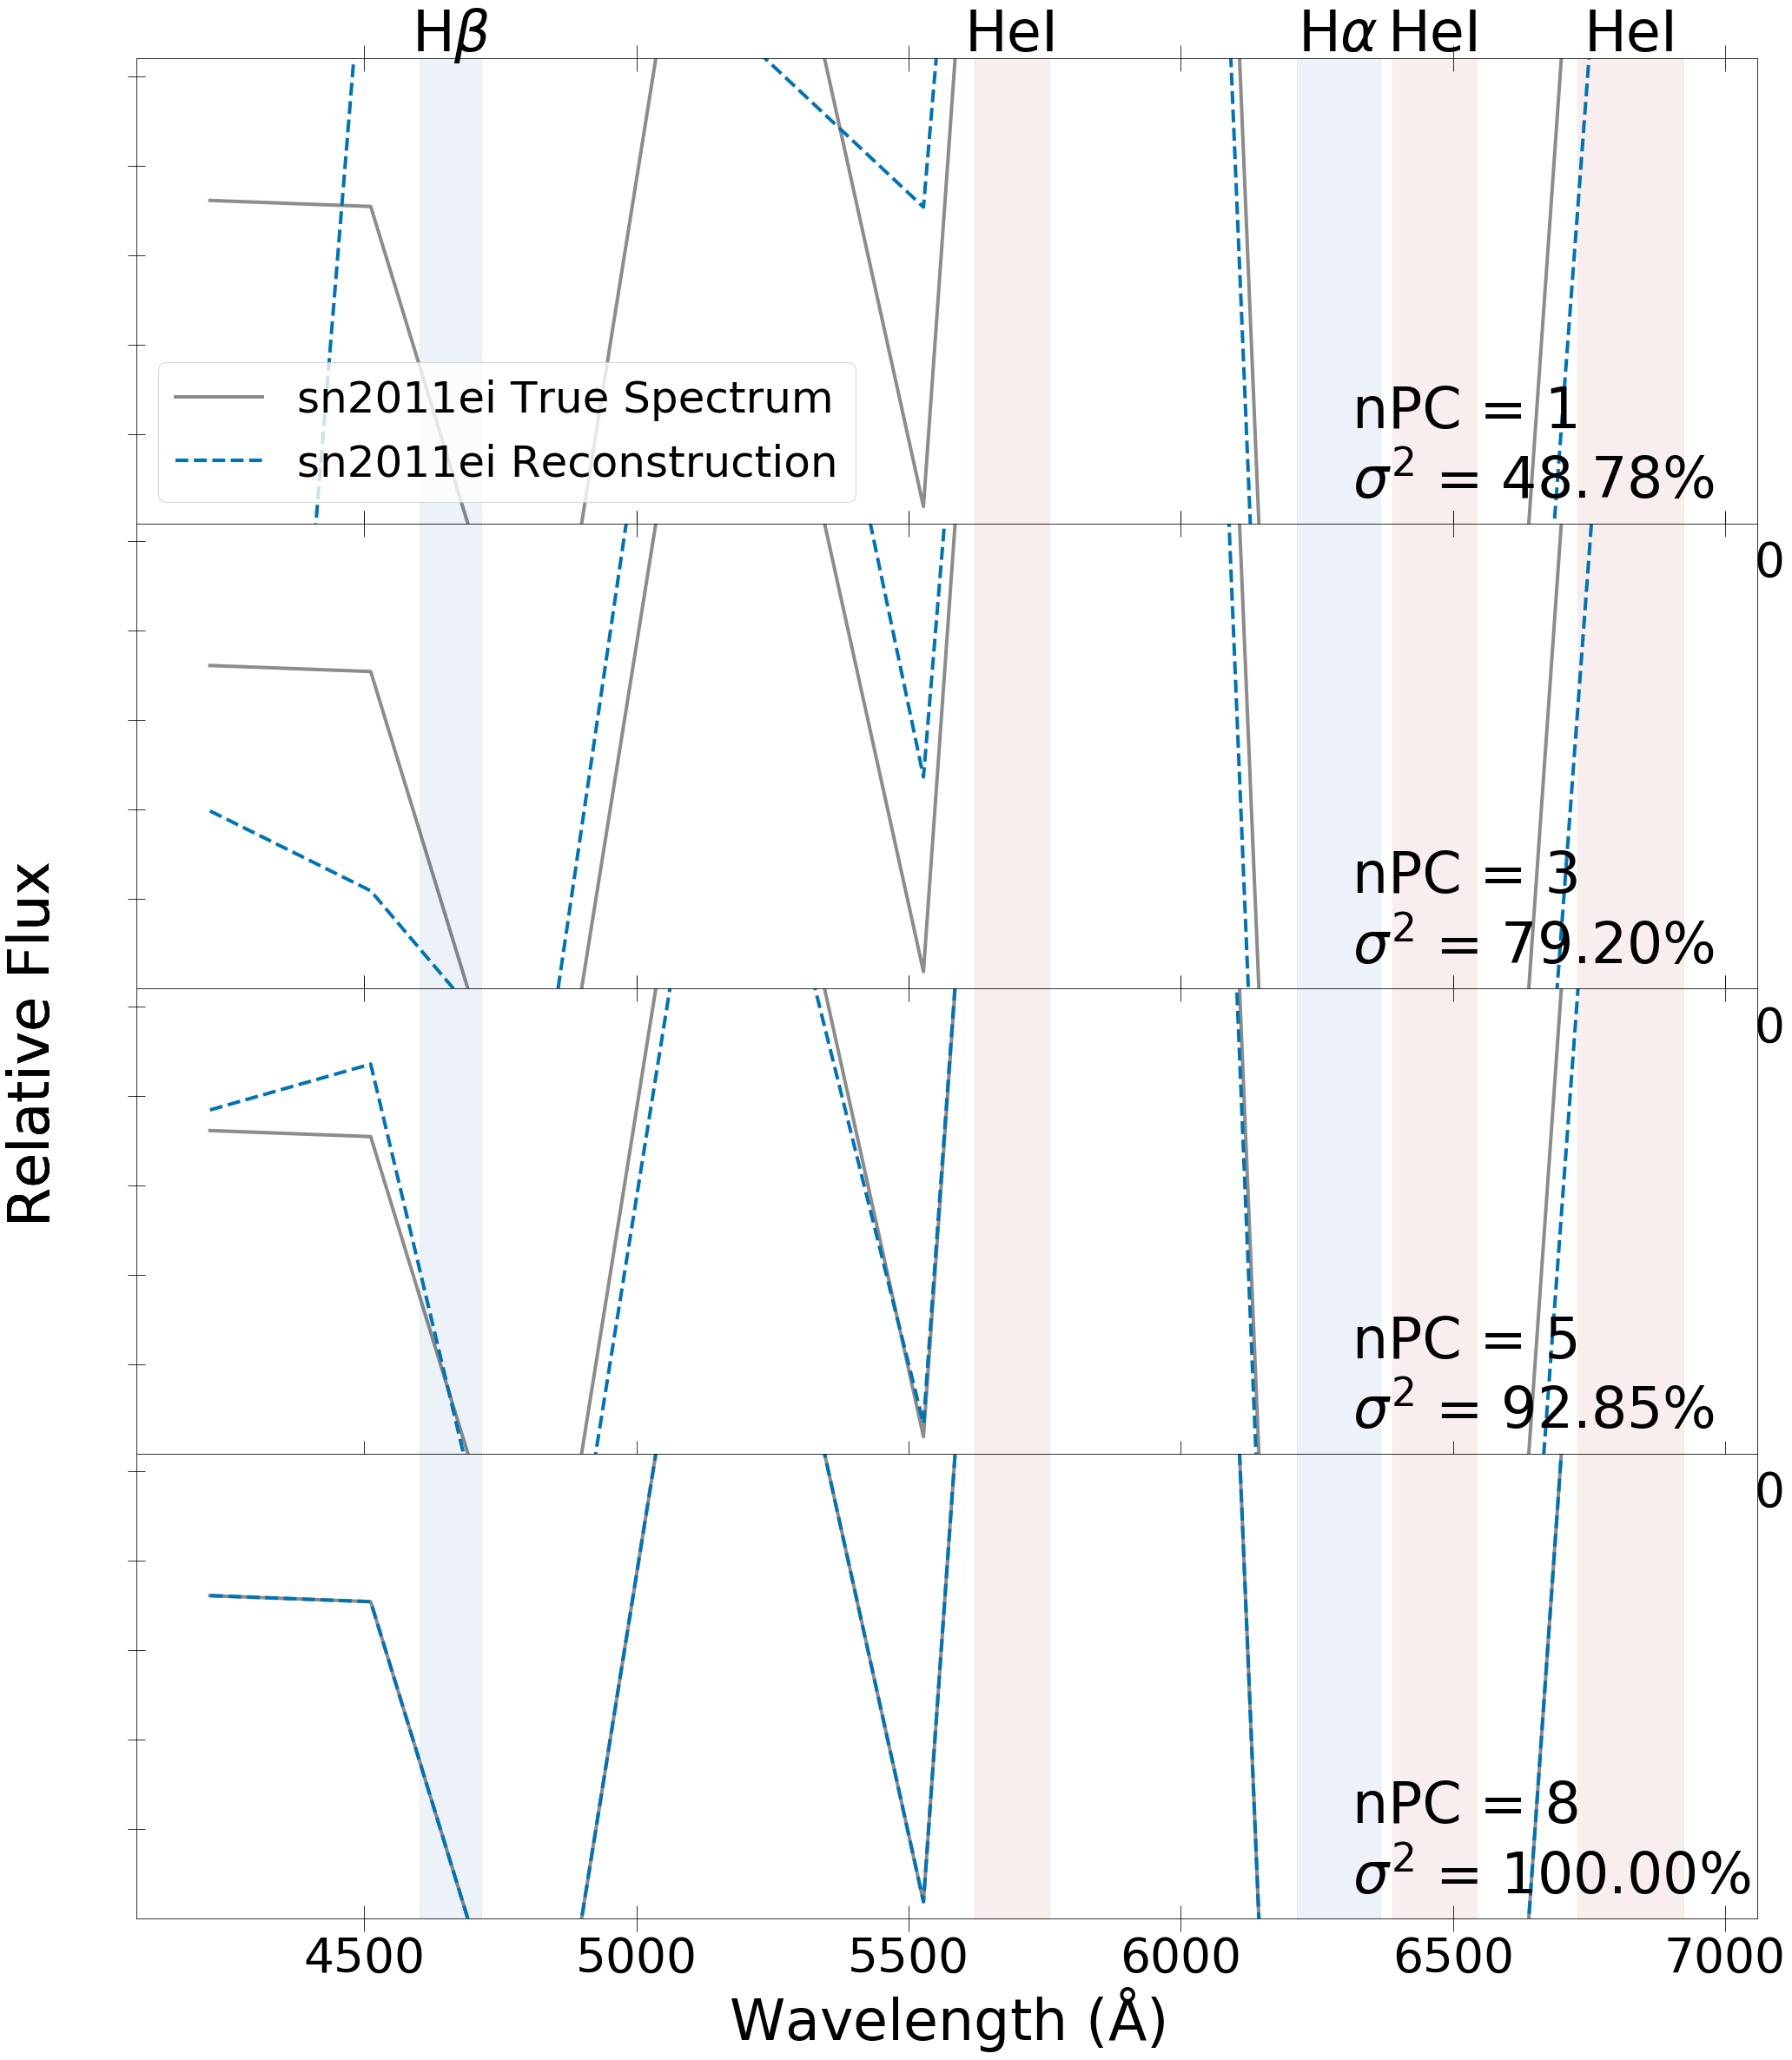

In [11]:
f,h=snidPCA15.reconstructSpectrumGrid((32,35),'sn2011ei', 'Ph13.0',3,[1,3,5,8],fontsize=65, leg_fontsize=50, ylim=(-1.6,1), dytick=0.5)

In [12]:
a=f.axes[0]
a.text(4000, 0.6,'$t_{V_{max}}=13.0$ days', fontsize=55)

Text(4000, 0.6, '$t_{V_{max}}=13.0$ days')

In [13]:
a=f.axes[-1]
from matplotlib.ticker import MultipleLocator
a.xaxis.set_minor_locator(MultipleLocator(100))

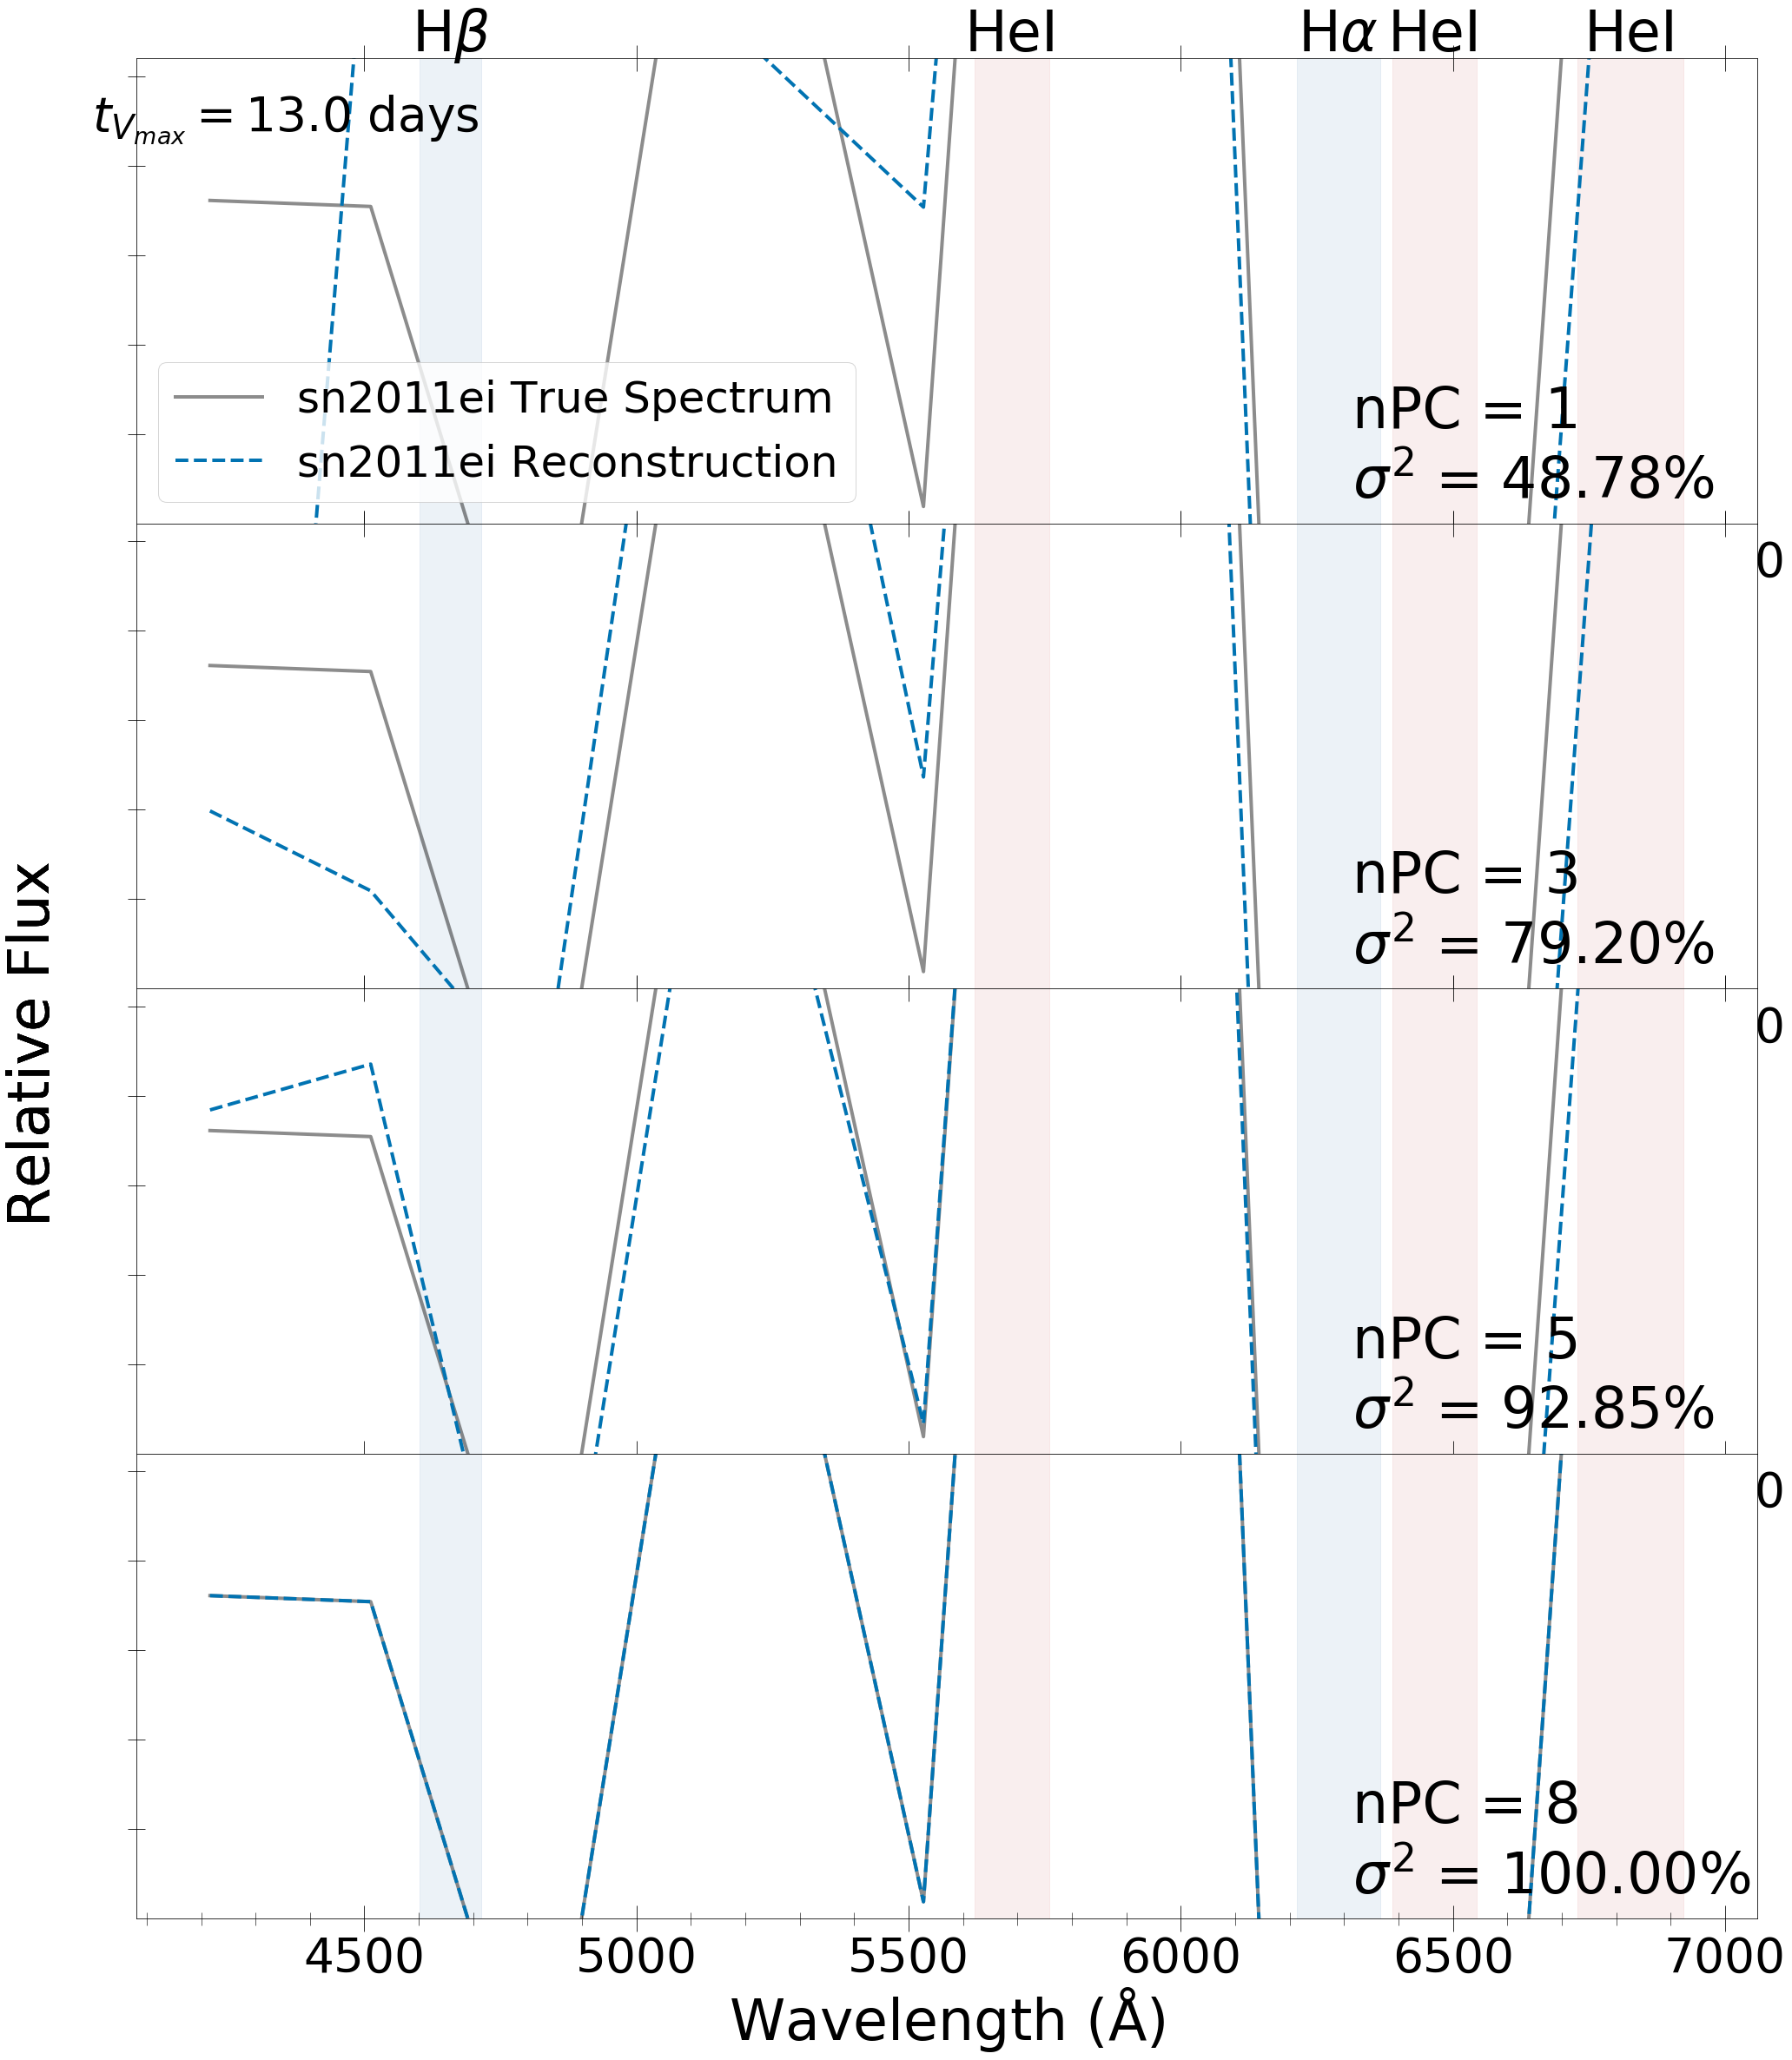

In [14]:
f

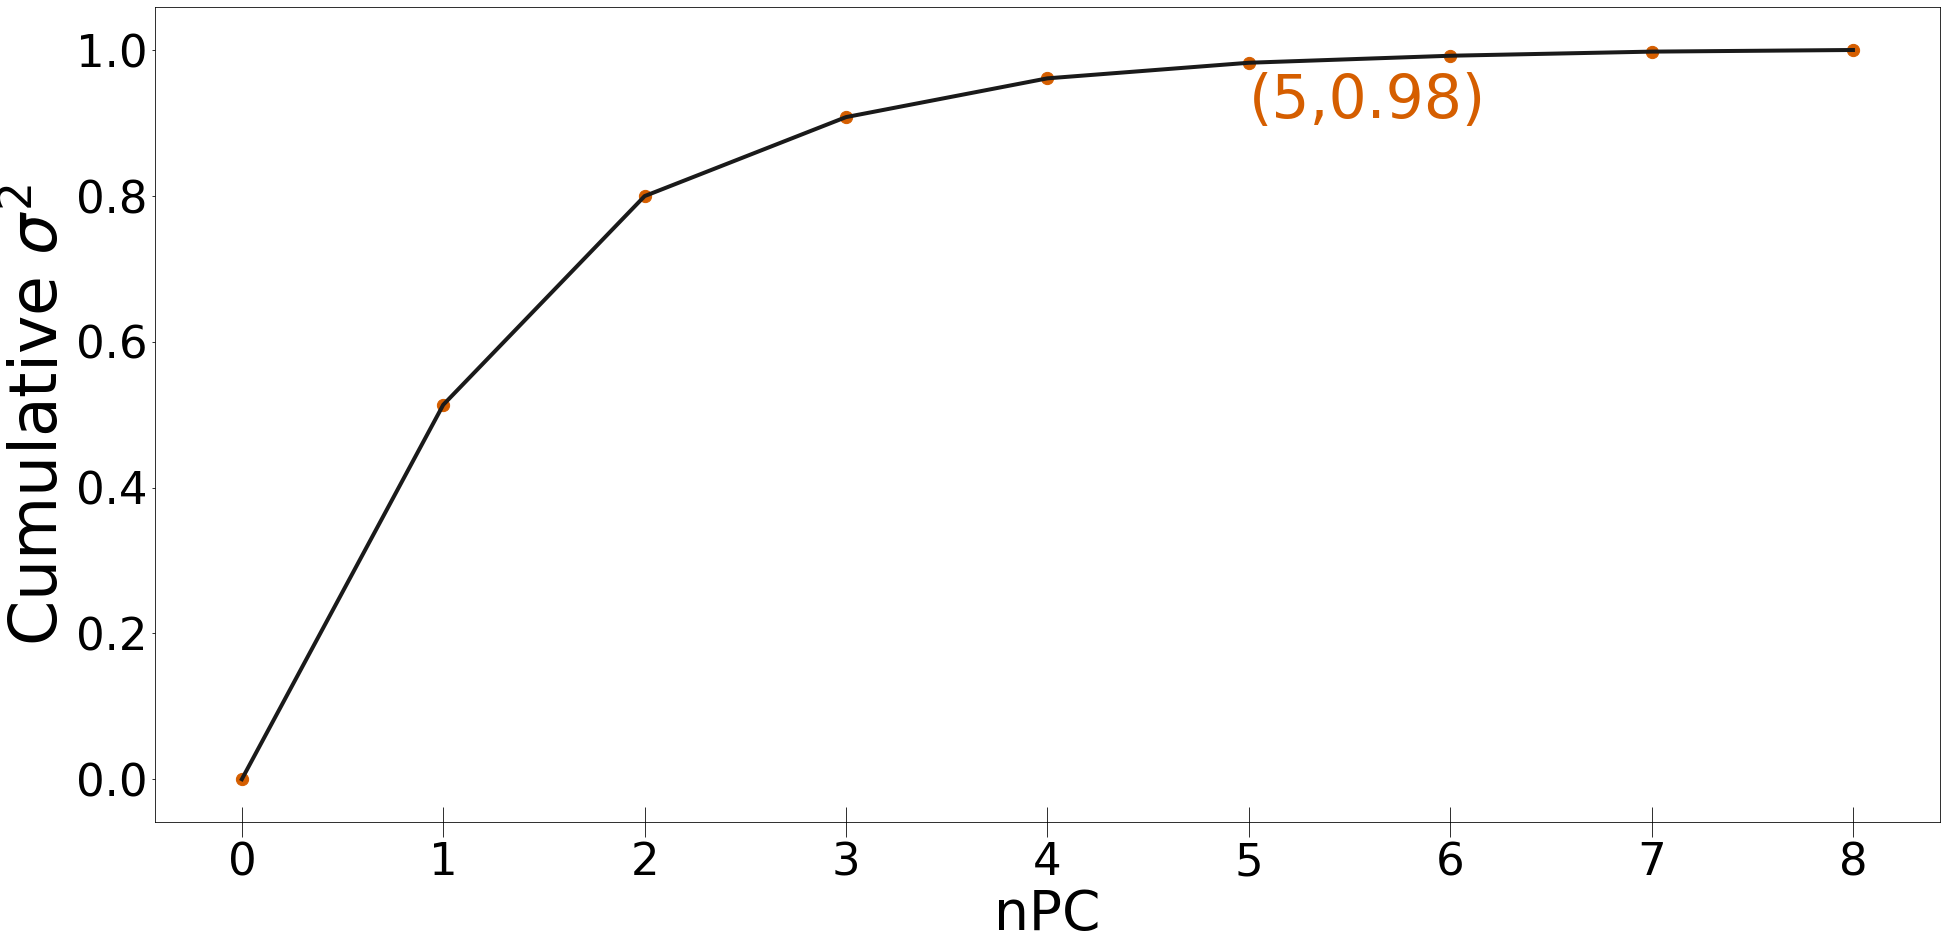

In [15]:
f, ax = snidPCA15.pcaCumPlot((32,15), fontsize=55)

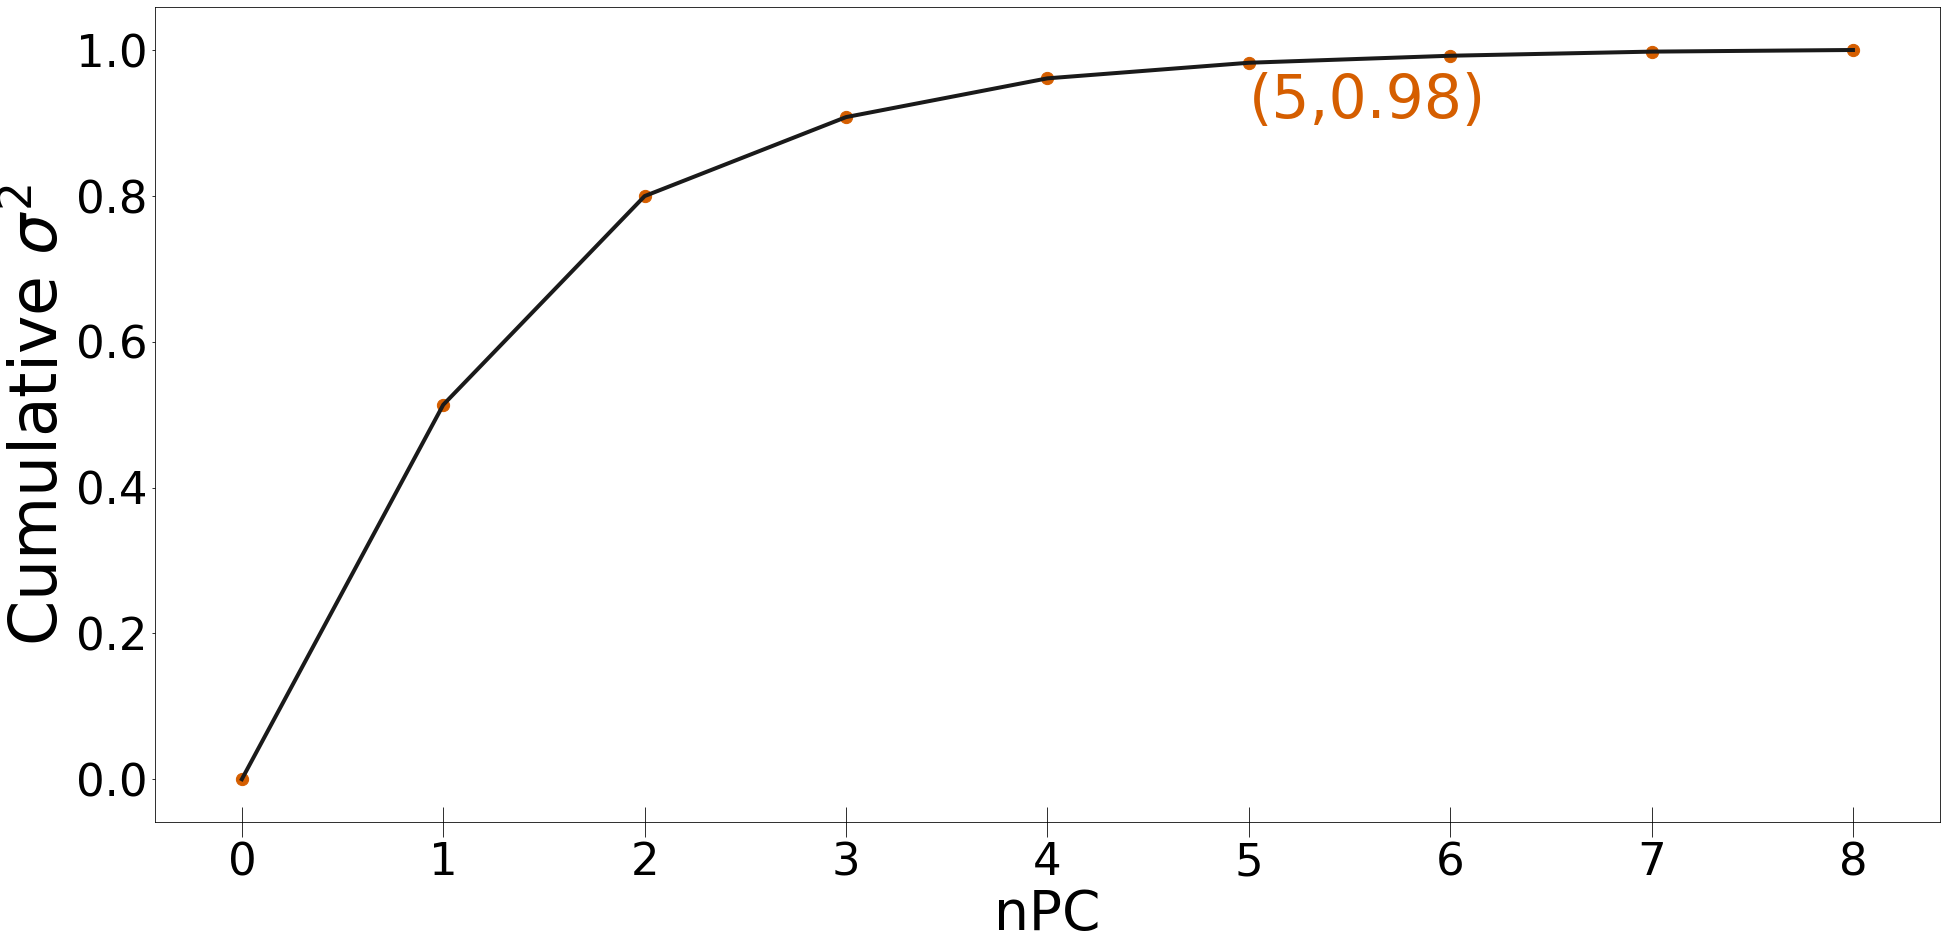

In [16]:
f

# Eigenspectra

Each panel of the following plot shows one of the first 5 eigenspectra in every phase range.  The eigenspectra signs are consistent across phases.

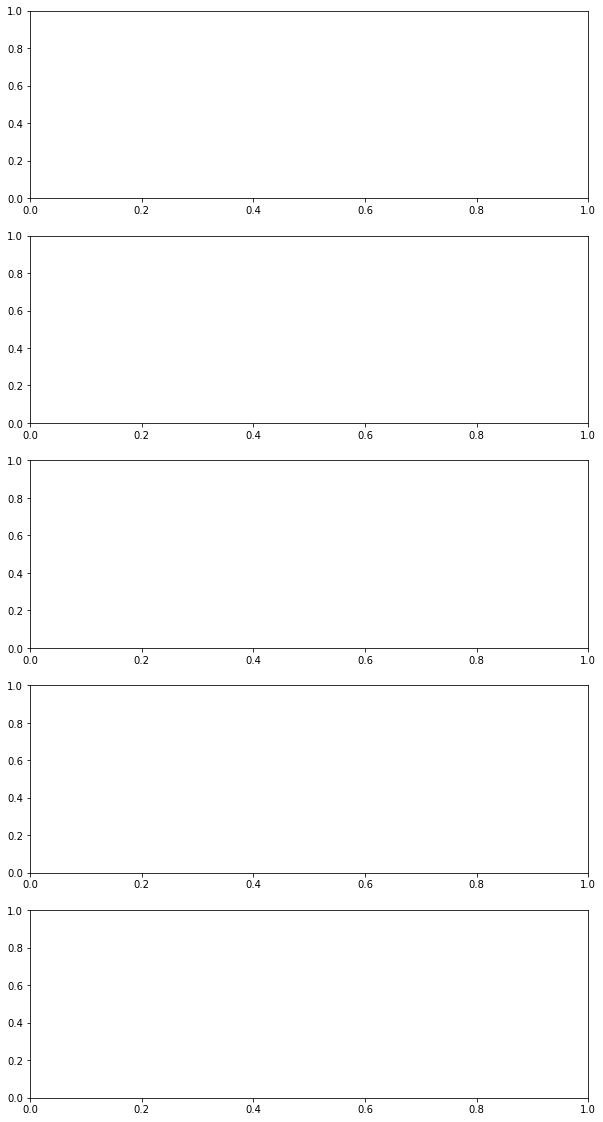

In [17]:
f, axs = plt.subplots(5,1,figsize=(10,20))

In [18]:
for i in range(5):
    ax = axs[i]
    ax.set_title('PCA%d Eigenspectra'%(i+1))
    ax.set_xlim((3800,7700))
    ax.set_yticks([])
    ax.plot(snidPCA0.wavelengths,snidPCA0.evecs[i]+2-0,'r',label='phase 0')
    ax.plot(snidPCA0.wavelengths,snidPCA5.evecs[i]+2-.5,'b',label='phase 5')
    ax.plot(snidPCA0.wavelengths,snidPCA10.evecs[i]+2-1,'c',label='phase 10')
    ax.plot(snidPCA0.wavelengths,snidPCA15.evecs[i]+2-1.5,'g',label='phase 15')
    print(snidPCA0.wavelengths.shape)
    #ax.plot(snidPCA20.wavelengths,snidPCA20.evecs[i]+2-2,'k',label='phase 20')
    #ax.plot(snidPCA25.wavelengths,snidPCA25.evecs[i]+2-2.5,'y',label='phase 25')
    
    ax.legend()

(8,)
(8,)
(8,)
(8,)
(8,)


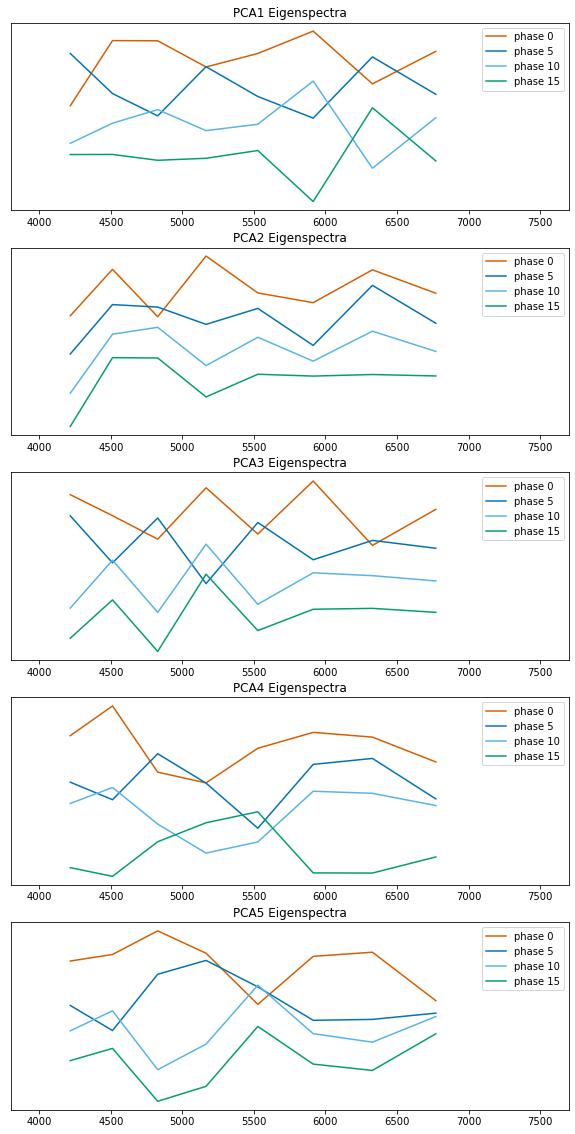

In [19]:
f

# Classification

The following cells construct a 4 panel plot, where each panel corresponds to a 2D projection of PCA space in a different phase range.

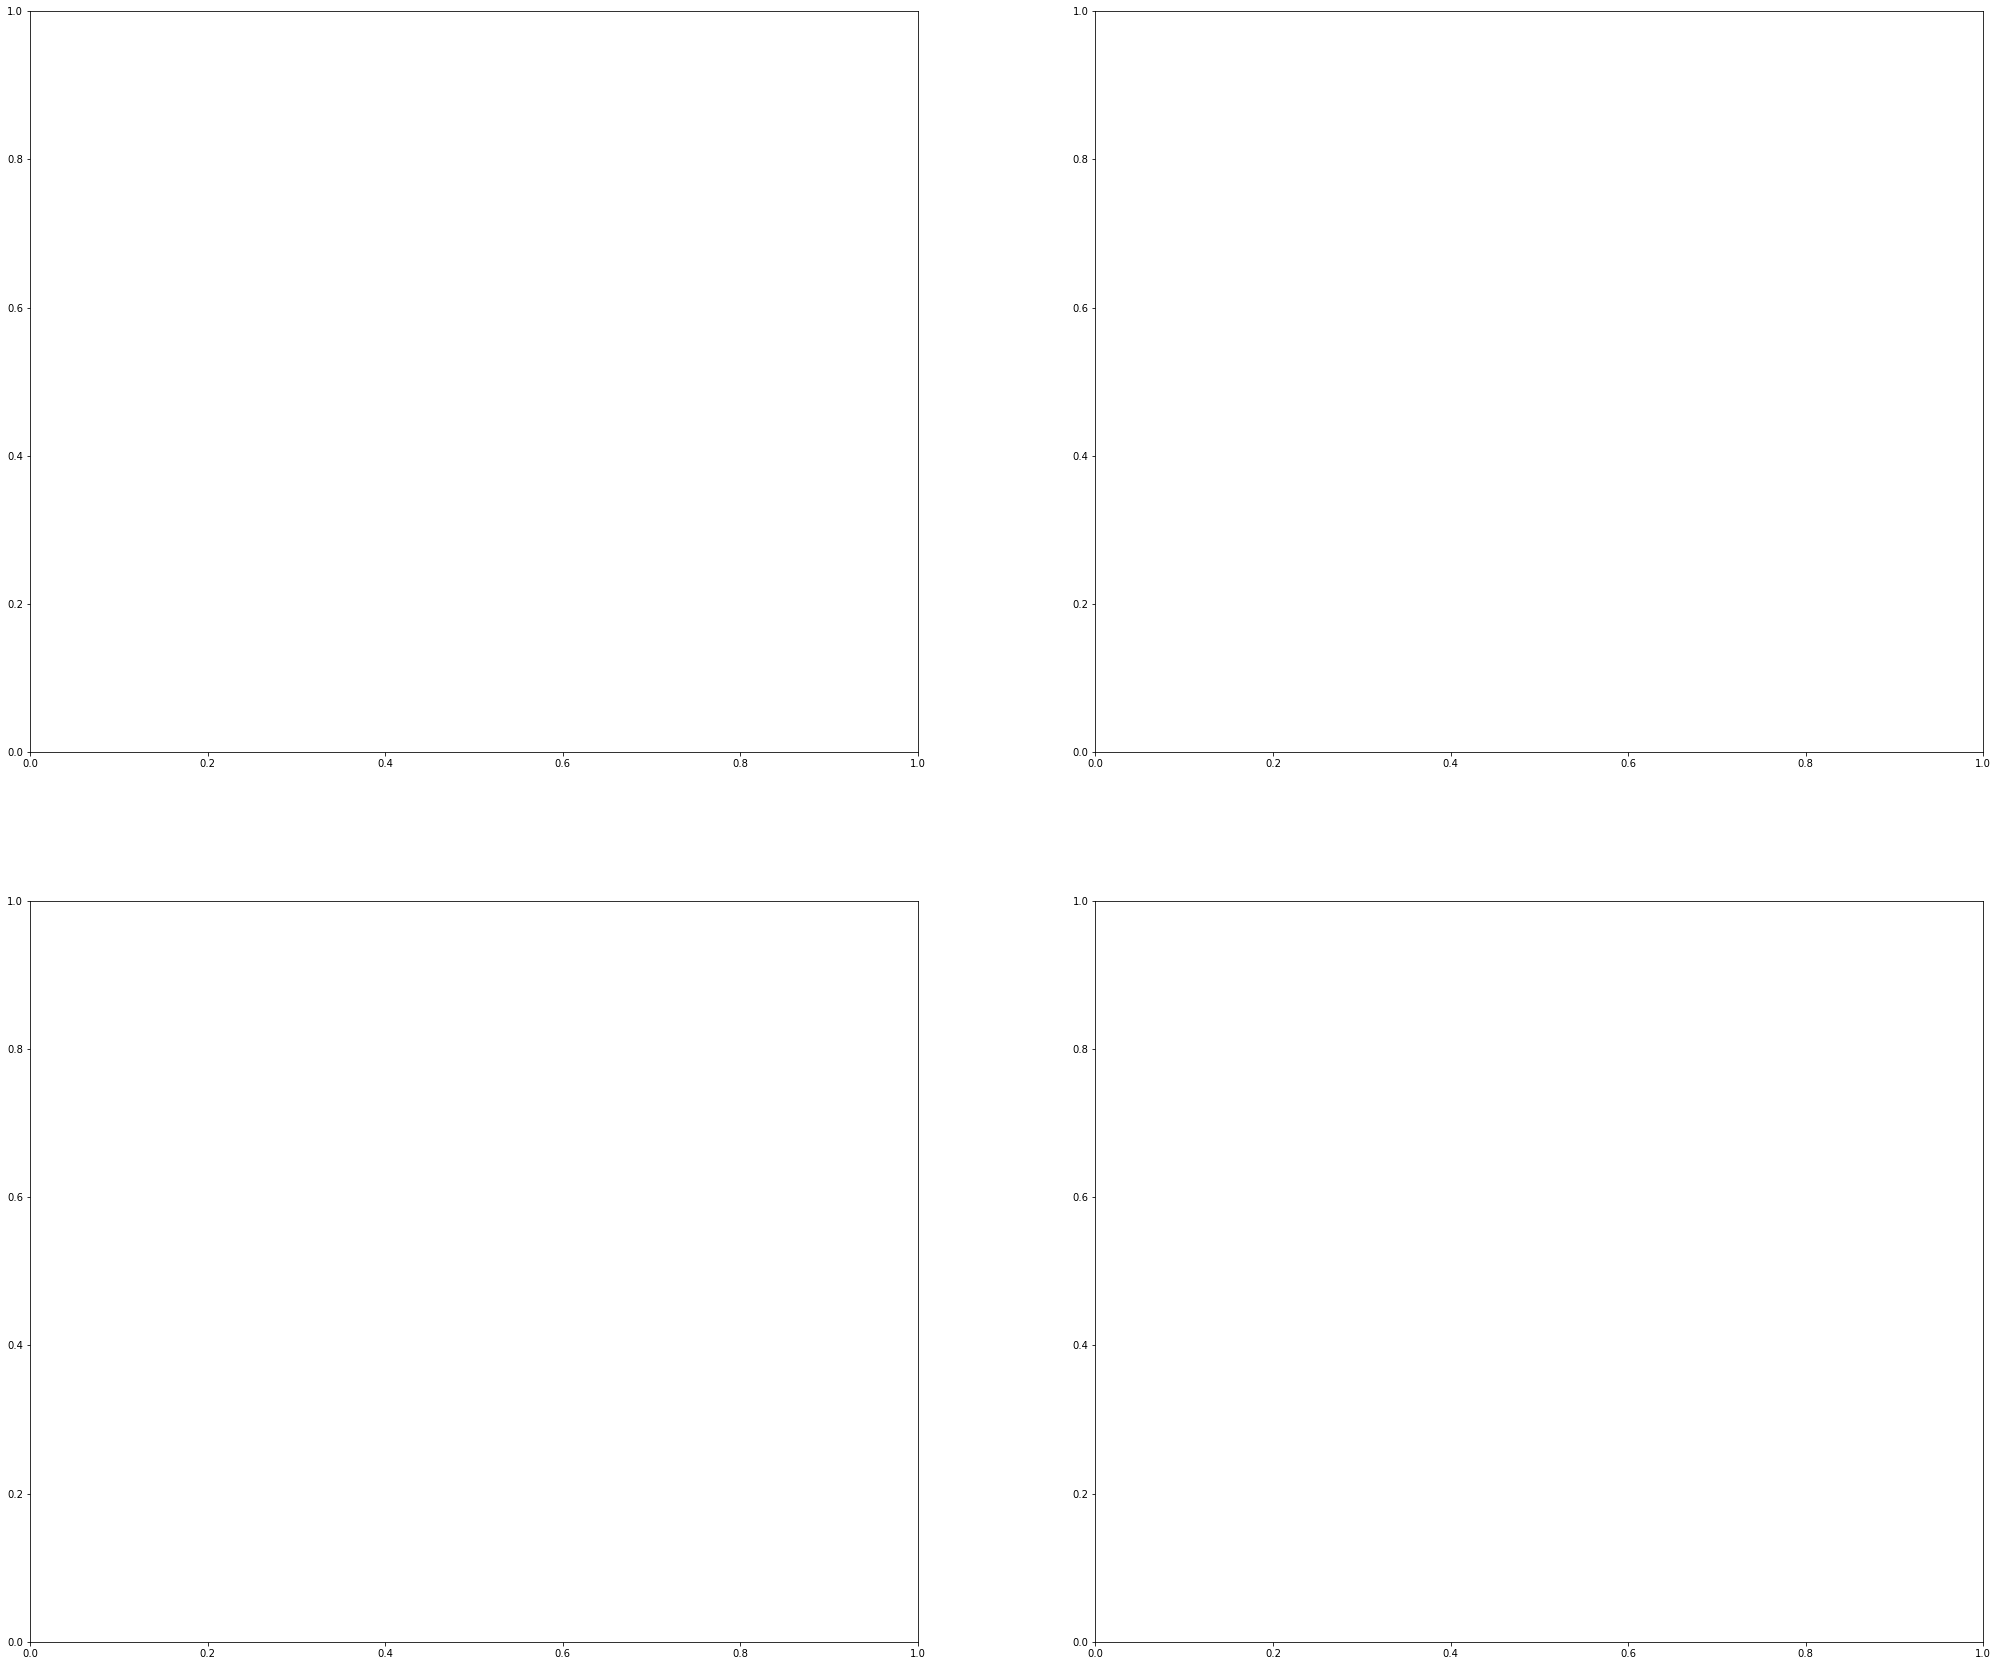

In [20]:
f_all, axs = plt.subplots(2,2,figsize=(35,30),gridspec_kw={'wspace':.2,'hspace':.2})

In [21]:
#Exclude Ib-pec and Ic-pec SNe
exclude = ['sn2007uy', 'sn2009er', 'sn2005ek']

In [22]:
svmsc=[]
f_all,svmsc,av0,std0=snidPCA0.pcaPlot(1,5,(10,7),alphamean=.5,alphaell=.1,alphasvm=10,purity=True,
                                     excludeSNe=exclude, std_rad=1.0, svm=True, count=3, fig=f_all,
                                     ax=f_all.axes[0],ncv=50, markOutliers=True)
print(av0, std0)

/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'darkgrey']
['limegreen', 'steelblue', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
0.5905882352941176 0.11033763847240805


/Users/marcwilliamson/src/dev/SESNspectraPCA/code/SNePCA.py:728: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/marcwilliamson/src/dev/SESNspectraPCA/code/SNePCA.py:730: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/marcwilliamson/src/dev/SESNspectraPCA/code/SNePCA.py:732: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/marcwilliamson/src/dev/SESNspectraPCA/code/SNePCA.py:734: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.



In [23]:
svmsc=[]
f_all,svmsc, av5, std5=snidPCA5.pcaPlot(1,3,(10,7),alphamean=.5,alphaell=.1,alphasvm=10,purity=True, 
                                       excludeSNe=exclude,std_rad=1.0, svm=True, count=3, 
                                       fig=f_all, ax=f_all.axes[1], ncv=50, markOutliers=True)
print(av5, std5)

/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']
0.525 0.09519716382329885


/Users/marcwilliamson/src/dev/SESNspectraPCA/code/SNePCA.py:728: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/marcwilliamson/src/dev/SESNspectraPCA/code/SNePCA.py:730: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/marcwilliamson/src/dev/SESNspectraPCA/code/SNePCA.py:732: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/marcwilliamson/src/dev/SESNspectraPCA/code/SNePCA.py:734: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.



In [24]:
svmsc=[]
f_all,svmsc, av10, std10=snidPCA10.pcaPlot(1,3,(10,7),alphamean=.5,alphaell=.1,alphasvm=10,
                                          purity=True,excludeSNe=exclude, std_rad=1.0, svm=True,
                                          count=3, fig=f_all, ax=f_all.axes[2],ncv=50, markOutliers=True)
print(av10, std10)

/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']
0.7058823529411765 0.10846522890932805


/Users/marcwilliamson/src/dev/SESNspectraPCA/code/SNePCA.py:728: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/marcwilliamson/src/dev/SESNspectraPCA/code/SNePCA.py:730: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/marcwilliamson/src/dev/SESNspectraPCA/code/SNePCA.py:732: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/marcwilliamson/src/dev/SESNspectraPCA/code/SNePCA.py:734: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.



In [25]:
svmsc=[]
f_all,svmsc, av15, std15=snidPCA15.pcaPlot(1,3,(10,7),alphamean=.5,alphaell=.1,alphasvm=10,
                                          purity=True, excludeSNe=exclude,std_rad=1.0,
                                          svm=True, count=3, fig=f_all, ax=f_all.axes[3],ncv=50, markOutliers=True)
print(av15, std15)

/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']
0.6658823529411765 0.10352941176470588


/Users/marcwilliamson/src/dev/SESNspectraPCA/code/SNePCA.py:728: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/marcwilliamson/src/dev/SESNspectraPCA/code/SNePCA.py:730: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/marcwilliamson/src/dev/SESNspectraPCA/code/SNePCA.py:732: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/marcwilliamson/src/dev/SESNspectraPCA/code/SNePCA.py:734: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.



In [26]:
for i,ax in enumerate(f_all.axes):
    l = ax.get_legend()
    t = l.get_title()
    t.set_fontsize(30)
    ax.tick_params(axis='both',which='major', length=20,direction='inout',labelsize=35)
    ax.tick_params(axis='both',which='minor', length=10,direction='inout')
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    if i==0:
        l = ax.get_legend()
        t = l.get_title()
        l.set_title('')
        ymax = ymax + 0.5
        ax.set_ylim((ymin,ymax+0.5))
        ax.text(xmin + .1,ymax - .3,'$t_{V_{max}} = 0 \pm 5$ days\nSVM Test Score = %.2f$\pm$%.2f'%(av0,std0),fontsize=45)
        ax.set_ylabel('PC5', fontsize=50)
        ax.set_xlabel('PC1', fontsize=50)
    elif i==1:
        ymax = ymax + 0.5
        ax.set_ylim((ymin,ymax+0.5))
        ax.text(xmin + .1,ymax - .2,'$t_{V_{max}} = 5 \pm 5$ days\nSVM Test Score = %.2f$\pm$%.2f'%(av5,std5),fontsize=45)
        ax.set_ylabel('PC3', fontsize=50)
        ax.set_xlabel('PC1', fontsize=50)
        ax.get_legend().remove()
    elif i==2:
        ymax = ymax + 0.5
        ax.set_ylim((ymin,ymax+0.5))
        ax.text(xmin + .1,ymax - .4,'$t_{V_{max}} = 10 \pm 5$ days\nSVM Test Score = %.2f$\pm$%.2f'%(av10,std10),fontsize=45)
        ax.set_ylabel('PC3', fontsize=50)
        ax.set_xlabel('PC1', fontsize=50)
        ax.get_legend().remove()
    else:
        ymax = ymax + 0.5
        ax.set_ylim((ymin,ymax+0.5))
        ax.text(xmin + .1,ymax - .4,'$t_{V_{max}} = 15 \pm 5$ days\nSVM Test Score = %.2f$\pm$%.2f'%(av15,std15),fontsize=45)
        ax.set_ylabel('PC3', fontsize=50)
        ax.set_xlabel('PC1', fontsize=50)
        ax.get_legend().remove()

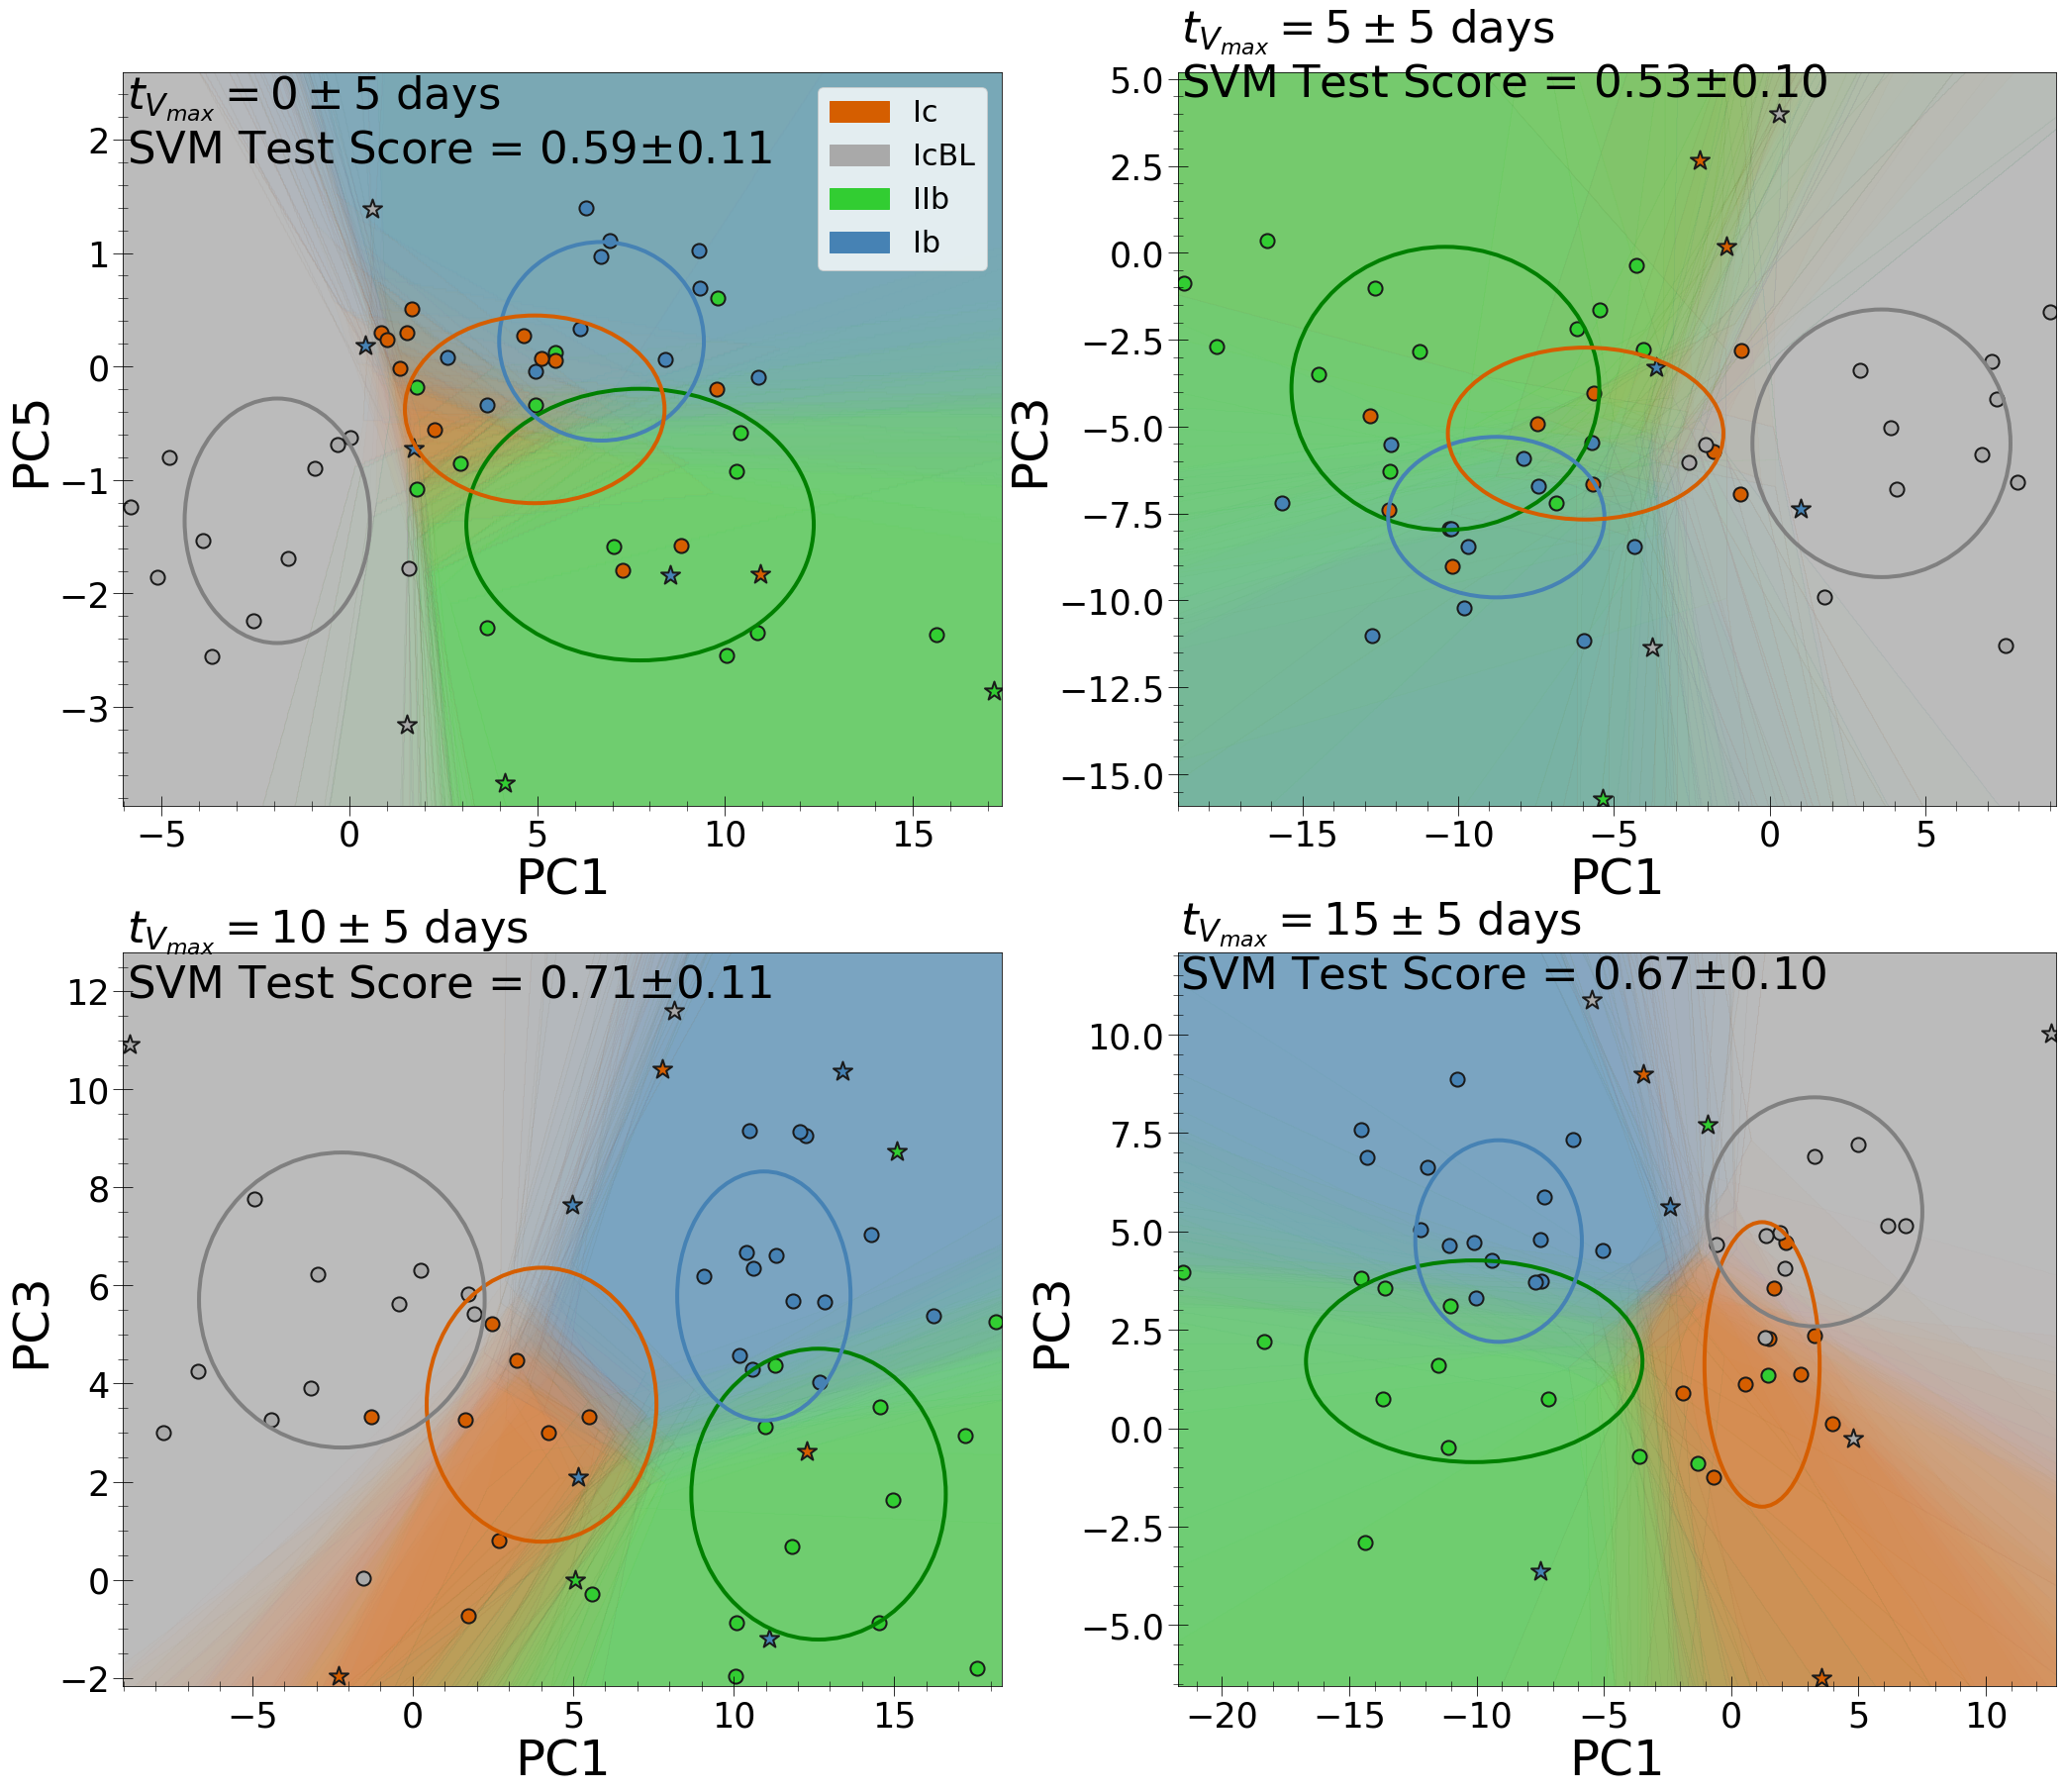

In [27]:
f_all

# Verify that SVM trained outside of my code gives consistent results

In [28]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

IIbMask, IbMask, IcMask, IcBLMask = snidPCA15.getSNeTypeMasks()
truth = 1*IIbMask + 2*IbMask + 3*IcMask + 4*IcBLMask
pcax = 1
pcay = 3
x = snidPCA15.pcaCoeffMatrix[:,pcax-1]
y = snidPCA15.pcaCoeffMatrix[:,pcay-1]
dat = np.column_stack((x,y))
linsvm = LinearSVC()

ncv=50
ncv_scores=[]
for i in range(ncv):
    trainX, testX, trainY, testY = train_test_split(dat, truth, test_size=0.3)
    linsvm.fit(trainX, trainY)
    score = linsvm.score(testX, testY)
    ncv_scores.append(score)

/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/ba

In [29]:
np.mean(ncv_scores)

0.6329411764705882

In [30]:
np.std(ncv_scores)

0.10158603832904896

# Replace Fluxes with Random Data

In [28]:
dataset0 = snid.loadPickle('../Data/DataProducts/dataset0.pickle')
dataset5 = snid.loadPickle('../Data/DataProducts/dataset5.pickle')
dataset10 = snid.loadPickle('../Data/DataProducts/dataset10.pickle')
dataset15 = snid.loadPickle('../Data/DataProducts/dataset15.pickle')

In [29]:
factor = 50.0
snid.datasetReduceResolution(dataset0, factor)
snid.datasetReduceResolution(dataset5, factor)
snid.datasetReduceResolution(dataset10, factor)
snid.datasetReduceResolution(dataset15, factor)

0 4216.388041262388
1 4511.605434628244
2 4827.492962832933
3 5165.497879608301
4 5527.168770553683
5 5914.162648054457
6 6328.252542963088
7 6771.335627824289
0 4216.388041262388
1 4511.605434628244
2 4827.492962832933
3 5165.497879608301
4 5527.168770553683
5 5914.162648054457
6 6328.252542963088
7 6771.335627824289
0 4216.388041262388
1 4511.605434628244
2 4827.492962832933
3 5165.497879608301
4 5527.168770553683
5 5914.162648054457
6 6328.252542963088
7 6771.335627824289
0 4216.388041262388
1 4511.605434628244
2 4827.492962832933
3 5165.497879608301
4 5527.168770553683
5 5914.162648054457
6 6328.252542963088
7 6771.335627824289
0 4216.388041262388
1 4511.605434628244
2 4827.492962832933
3 5165.497879608301
4 5527.168770553683
5 5914.162648054457
6 6328.252542963088
7 6771.335627824289
0 4216.388041262388
1 4511.605434628244
2 4827.492962832933
3 5165.497879608301
4 5527.168770553683
5 5914.162648054457
6 6328.252542963088
7 6771.335627824289
0 4216.388041262388
1 4511.605434628244


6 6328.252542963088
7 6771.335627824289
0 4216.388041262388
1 4511.605434628244
2 4827.492962832933
3 5165.497879608301
4 5527.168770553683
5 5914.162648054457
6 6328.252542963088
7 6771.335627824289
0 4216.388041262388
1 4511.605434628244
2 4827.492962832933
3 5165.497879608301
4 5527.168770553683
5 5914.162648054457
6 6328.252542963088
7 6771.335627824289
0 4216.388041262388
1 4511.605434628244
2 4827.492962832933
3 5165.497879608301
4 5527.168770553683
5 5914.162648054457
6 6328.252542963088
7 6771.335627824289
0 4216.388041262388
1 4511.605434628244
2 4827.492962832933
3 5165.497879608301
4 5527.168770553683
5 5914.162648054457
6 6328.252542963088
7 6771.335627824289
0 4216.388041262388
1 4511.605434628244
2 4827.492962832933
3 5165.497879608301
4 5527.168770553683
5 5914.162648054457
6 6328.252542963088
7 6771.335627824289
0 4216.388041262388
1 4511.605434628244
2 4827.492962832933
3 5165.497879608301
4 5527.168770553683
5 5914.162648054457
6 6328.252542963088
7 6771.335627824289


In [30]:
snid.datasetNoiseFlux(dataset0)
snid.datasetNoiseFlux(dataset5)
snid.datasetNoiseFlux(dataset10)
snid.datasetNoiseFlux(dataset15)

In [31]:
snidPCA0 = SNePCA.SNePCA(dataset0, -5, 5)
snidPCA5 = SNePCA.SNePCA(dataset5, 0, 10)
snidPCA10 = SNePCA.SNePCA(dataset10, 5, 15)
snidPCA15 = SNePCA.SNePCA(dataset15, 10, 20)

In [32]:
snidPCA0.snidPCA()
snidPCA5.snidPCA()
snidPCA10.snidPCA()
snidPCA15.snidPCA()

In [33]:
snidPCA0.calcPCACoeffs()
snidPCA5.calcPCACoeffs()
snidPCA10.calcPCACoeffs()
snidPCA15.calcPCACoeffs()

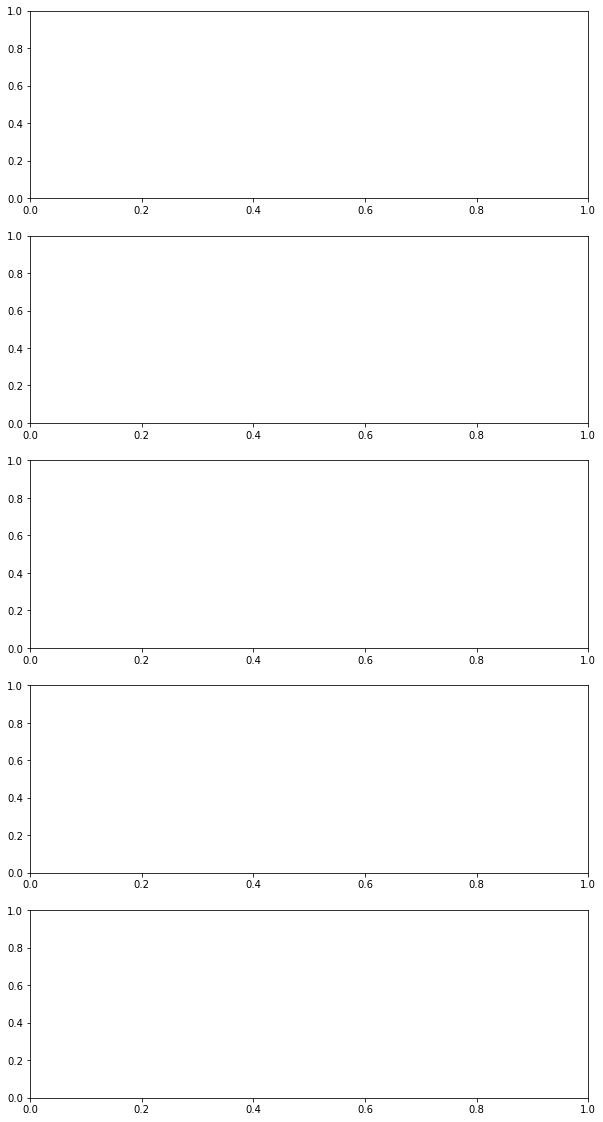

In [34]:
f, axs = plt.subplots(5,1,figsize=(10,20))

In [35]:
for i in range(5):
    ax = axs[i]
    ax.set_title('PCA%d Eigenspectra'%(i+1))
    ax.set_xlim((3800,7700))
    ax.set_yticks([])
    ax.plot(snidPCA0.wavelengths,snidPCA0.evecs[i]+2-0,'r',label='phase 0')
    ax.plot(snidPCA0.wavelengths,snidPCA5.evecs[i]+2-.5,'b',label='phase 5')
    ax.plot(snidPCA0.wavelengths,snidPCA10.evecs[i]+2-1,'c',label='phase 10')
    ax.plot(snidPCA0.wavelengths,snidPCA15.evecs[i]+2-1.5,'g',label='phase 15')
    print(snidPCA0.wavelengths.shape)
    #ax.plot(snidPCA20.wavelengths,snidPCA20.evecs[i]+2-2,'k',label='phase 20')
    #ax.plot(snidPCA25.wavelengths,snidPCA25.evecs[i]+2-2.5,'y',label='phase 25')
    
    ax.legend()

(8,)
(8,)
(8,)
(8,)
(8,)


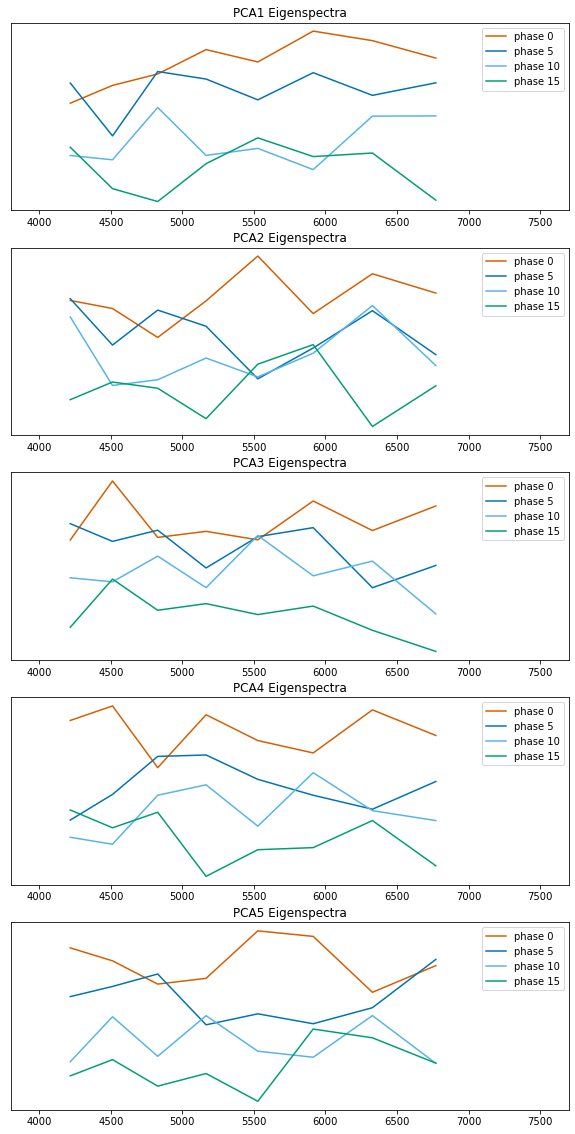

In [36]:
f

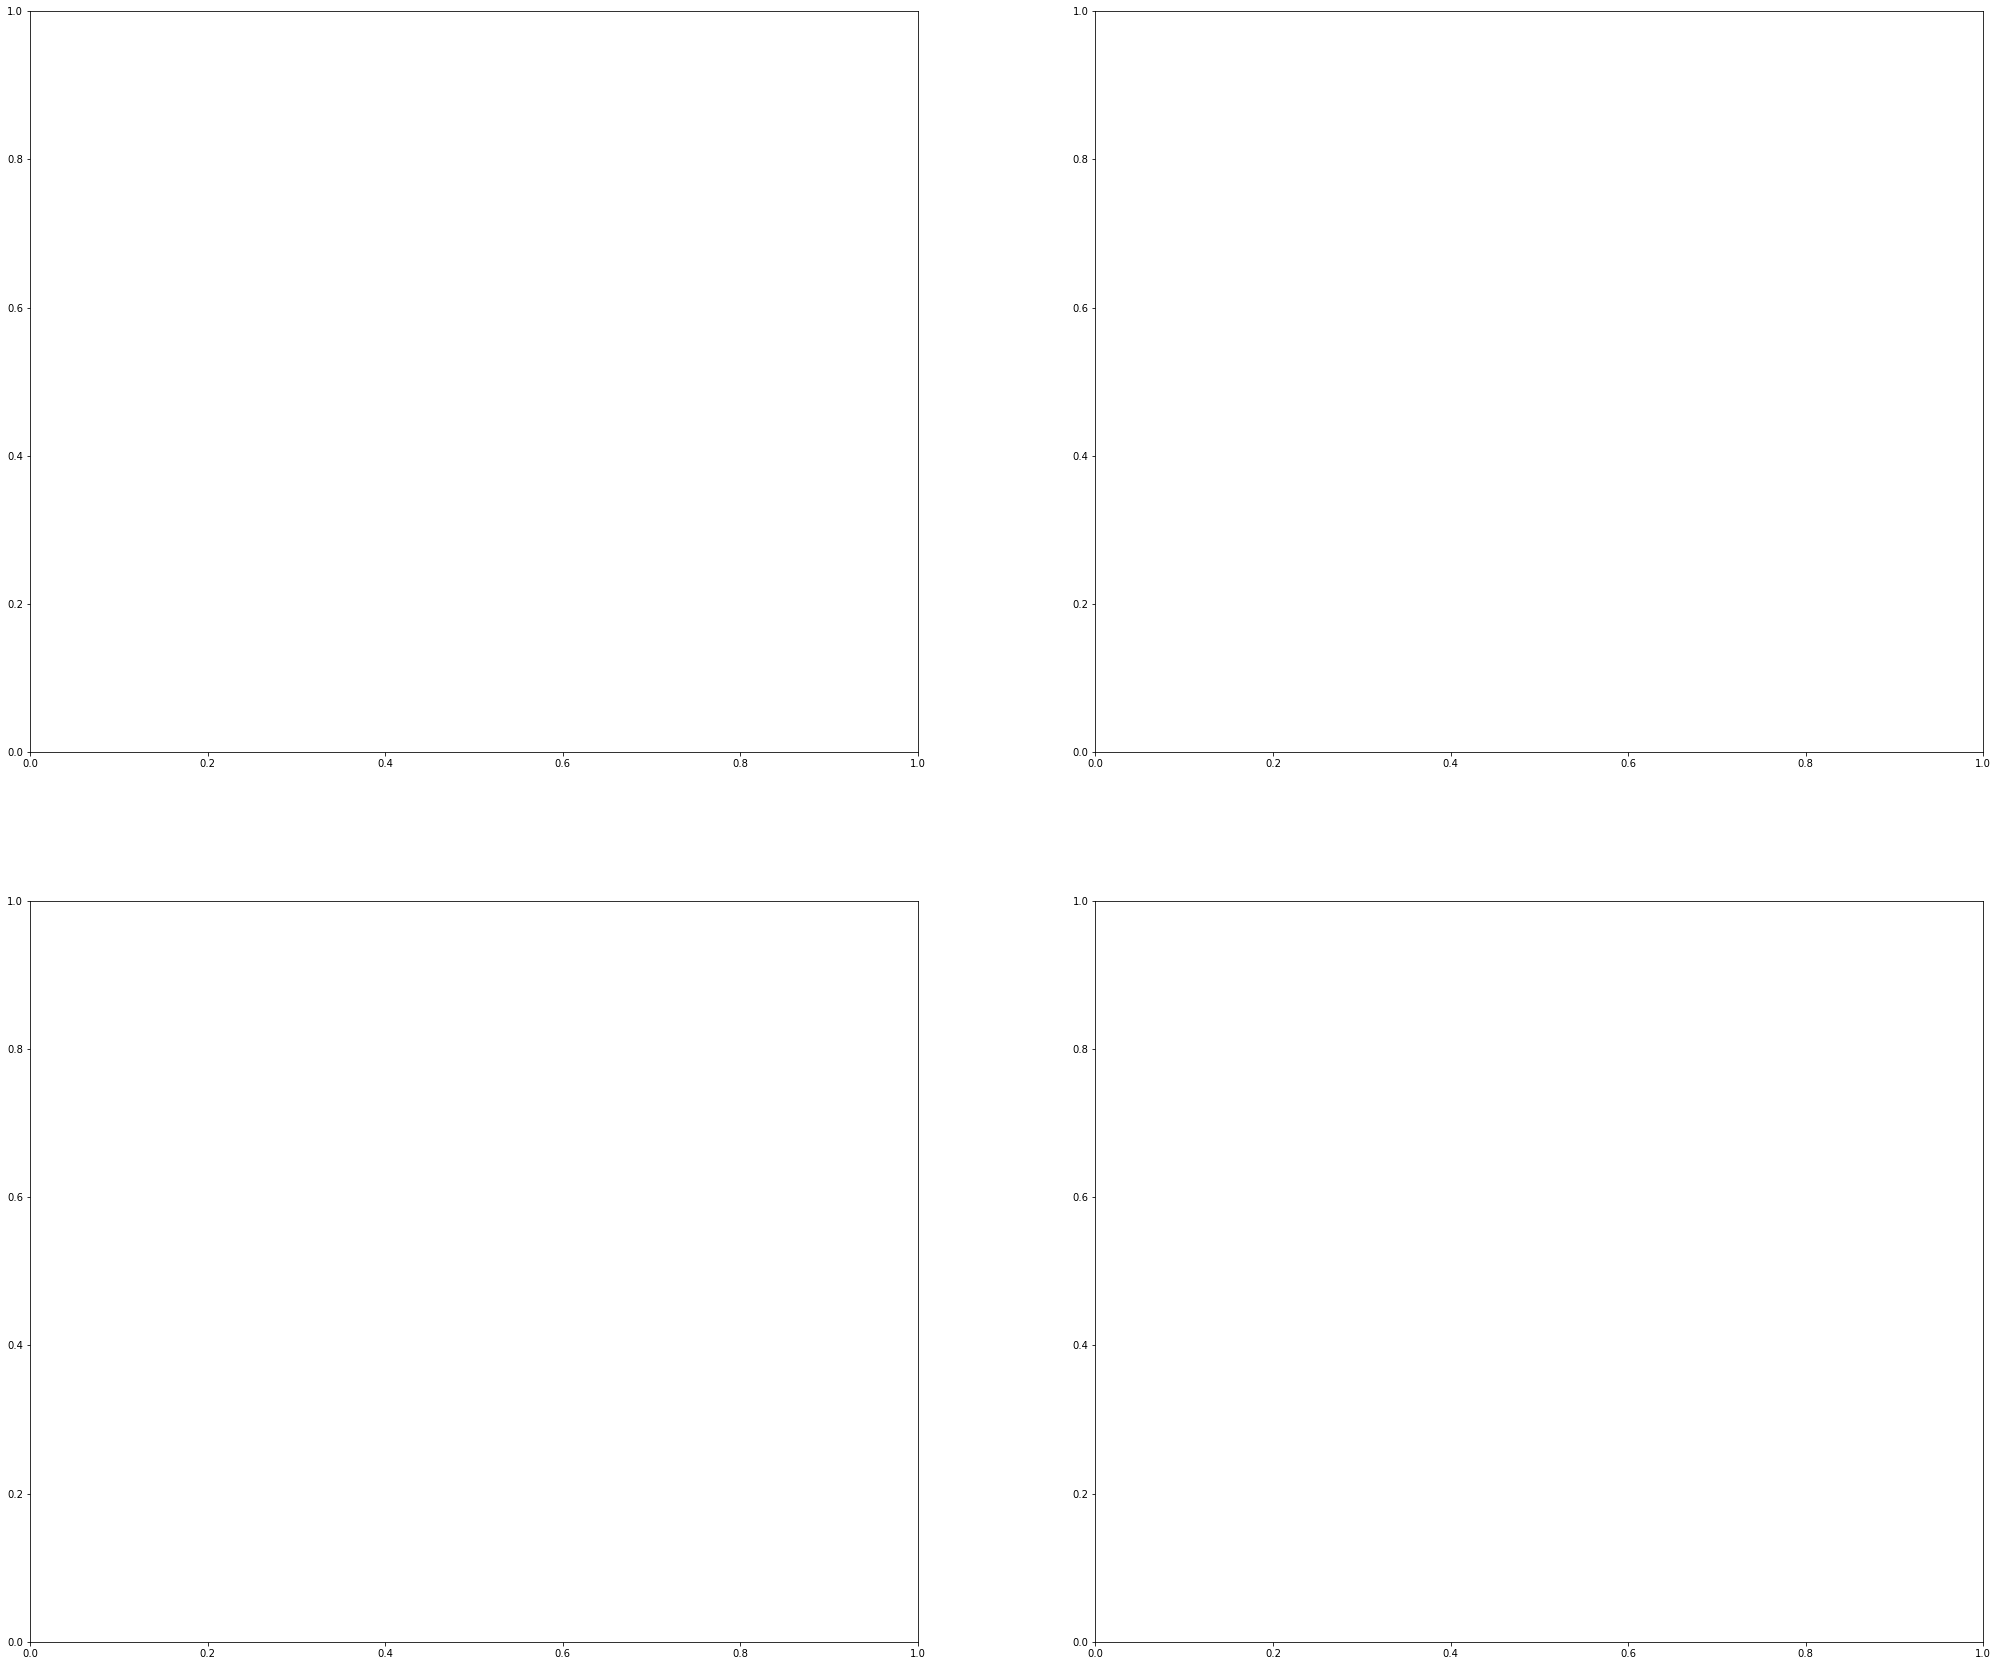

In [37]:
f_all, axs = plt.subplots(2,2,figsize=(35,30),gridspec_kw={'wspace':.2,'hspace':.2})

In [38]:
#Exclude Ib-pec and Ic-pec SNe
exclude = ['sn2007uy', 'sn2009er', 'sn2005ek']

In [39]:
svmsc=[]
f_all,svmsc,av0,std0=snidPCA0.pcaPlot(1,5,(10,7),alphamean=.5,alphaell=.1,alphasvm=10,purity=True,
                                     excludeSNe=exclude, std_rad=1.0, svm=True, count=3, fig=f_all,
                                     ax=f_all.axes[0],ncv=50, markOutliers=True)
print(av0, std0)

['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'gray']
['g', 'mediumorchid', 'r']
['g', 'mediumorchid', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'gray']
['g', 'mediumorchid', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'gray']
['g', 

/Users/marcwilliamson/src/dev/SESNspectraPCA/code/SNePCA.py:728: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/marcwilliamson/src/dev/SESNspectraPCA/code/SNePCA.py:730: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/marcwilliamson/src/dev/SESNspectraPCA/code/SNePCA.py:732: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/marcwilliamson/src/dev/SESNspectraPCA/code/SNePCA.py:734: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.



In [40]:
svmsc=[]
f_all,svmsc, av5, std5=snidPCA5.pcaPlot(1,3,(10,7),alphamean=.5,alphaell=.1,alphasvm=10,purity=True, 
                                       excludeSNe=exclude,std_rad=1.0, svm=True, count=3, 
                                       fig=f_all, ax=f_all.axes[1], ncv=50, markOutliers=True)
print(av5, std5)

['g', 'mediumorchid', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'gray']
['g', 'mediumorchid', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'gray']
['g', '

/Users/marcwilliamson/src/dev/SESNspectraPCA/code/SNePCA.py:728: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/marcwilliamson/src/dev/SESNspectraPCA/code/SNePCA.py:730: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/marcwilliamson/src/dev/SESNspectraPCA/code/SNePCA.py:732: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/marcwilliamson/src/dev/SESNspectraPCA/code/SNePCA.py:734: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.



In [41]:
svmsc=[]
f_all,svmsc, av10, std10=snidPCA10.pcaPlot(1,3,(10,7),alphamean=.5,alphaell=.1,alphasvm=10,
                                          purity=True,excludeSNe=exclude, std_rad=1.0, svm=True,
                                          count=3, fig=f_all, ax=f_all.axes[2],ncv=50, markOutliers=True)
print(av10, std10)

['g', 'mediumorchid', 'gray']
['mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r']
['g', 'mediumorchid', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'gray']
['mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'gray']
['g', 'mediumorchid', 'r']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'gray']
['g', 'mediumorchid', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['mediumorchid', 'r', 'gra

/Users/marcwilliamson/src/dev/SESNspectraPCA/code/SNePCA.py:728: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/marcwilliamson/src/dev/SESNspectraPCA/code/SNePCA.py:730: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/marcwilliamson/src/dev/SESNspectraPCA/code/SNePCA.py:732: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/marcwilliamson/src/dev/SESNspectraPCA/code/SNePCA.py:734: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.



In [42]:
svmsc=[]
f_all,svmsc, av15, std15=snidPCA15.pcaPlot(1,3,(10,7),alphamean=.5,alphaell=.1,alphasvm=10,
                                          purity=True, excludeSNe=exclude,std_rad=1.0,
                                          svm=True, count=3, fig=f_all, ax=f_all.axes[3],ncv=50, markOutliers=True)
print(av15, std15)

['g', 'mediumorchid', 'r']
['g', 'mediumorchid', 'r', 'gray']
['mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r']
['g', 'mediumorchid', 'r']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['mediumorchid', 'r', 'gray']
['mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r', 'gray']
['g', 'mediumorchid', 'r']
['g', 'mediumor

/Users/marcwilliamson/src/dev/SESNspectraPCA/code/SNePCA.py:728: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/marcwilliamson/src/dev/SESNspectraPCA/code/SNePCA.py:730: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/marcwilliamson/src/dev/SESNspectraPCA/code/SNePCA.py:732: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/marcwilliamson/src/dev/SESNspectraPCA/code/SNePCA.py:734: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.



In [43]:
for i,ax in enumerate(f_all.axes):
    l = ax.get_legend()
    t = l.get_title()
    t.set_fontsize(30)
    ax.tick_params(axis='both',which='major', length=20,direction='inout',labelsize=35)
    ax.tick_params(axis='both',which='minor', length=10,direction='inout')
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    if i==0:
        l = ax.get_legend()
        t = l.get_title()
        l.set_title('')
        ymax = ymax + 0.5
        ax.set_ylim((ymin,ymax+0.5))
        ax.text(xmin + .1,ymax - .3,'$t_{V_{max}} = 0 \pm 5$ days\nSVM Test Score = %.2f$\pm$%.2f'%(av0,std0),fontsize=45)
        ax.set_ylabel('PC5', fontsize=50)
        ax.set_xlabel('PC1', fontsize=50)
    elif i==1:
        ymax = ymax + 0.5
        ax.set_ylim((ymin,ymax+0.5))
        ax.text(xmin + .1,ymax - .2,'$t_{V_{max}} = 5 \pm 5$ days\nSVM Test Score = %.2f$\pm$%.2f'%(av5,std5),fontsize=45)
        ax.set_ylabel('PC3', fontsize=50)
        ax.set_xlabel('PC1', fontsize=50)
        ax.get_legend().remove()
    elif i==2:
        ymax = ymax + 0.5
        ax.set_ylim((ymin,ymax+0.5))
        ax.text(xmin + .1,ymax - .4,'$t_{V_{max}} = 10 \pm 5$ days\nSVM Test Score = %.2f$\pm$%.2f'%(av10,std10),fontsize=45)
        ax.set_ylabel('PC3', fontsize=50)
        ax.set_xlabel('PC1', fontsize=50)
        ax.get_legend().remove()
    else:
        ymax = ymax + 0.5
        ax.set_ylim((ymin,ymax+0.5))
        ax.text(xmin + .1,ymax - .4,'$t_{V_{max}} = 15 \pm 5$ days\nSVM Test Score = %.2f$\pm$%.2f'%(av15,std15),fontsize=45)
        ax.set_ylabel('PC3', fontsize=50)
        ax.set_xlabel('PC1', fontsize=50)
        ax.get_legend().remove()

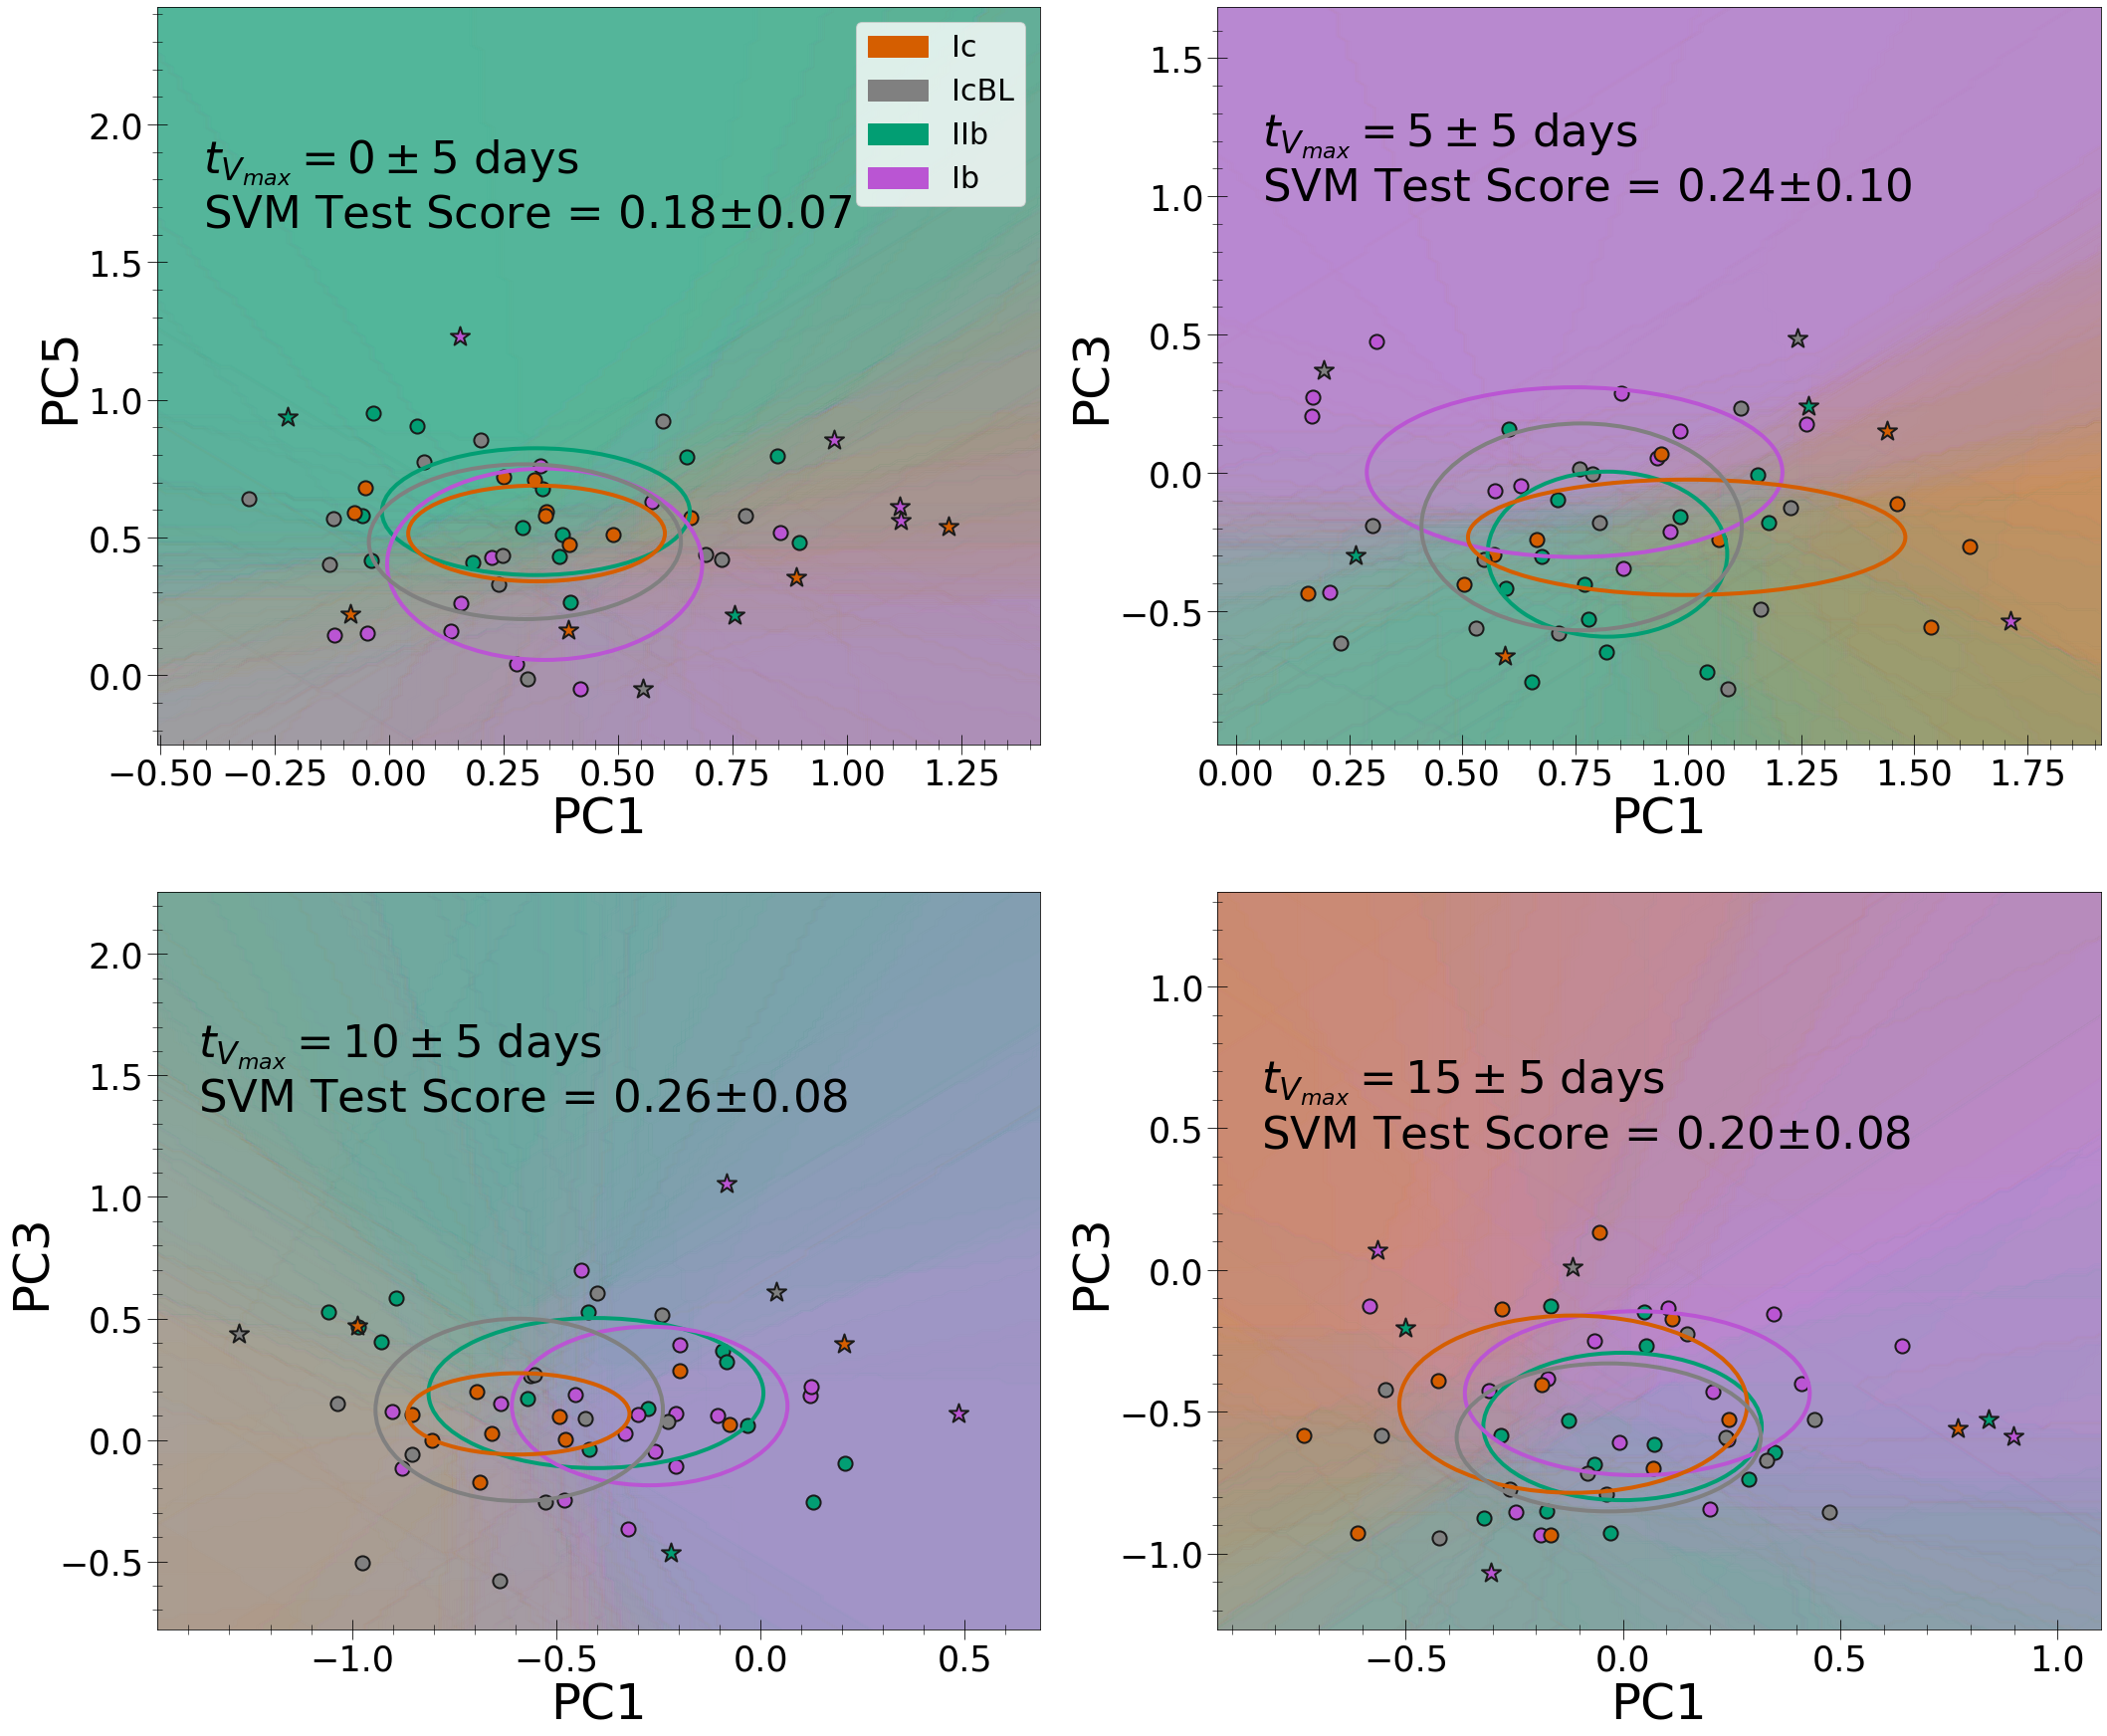

In [44]:
f_all